## Forex data EDA, comparison and preprocessing

In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(""), os.pardir)))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import timedelta
from IPython.display import display, HTML
from data.forex import (
    FOREX_DATA_PATH,
    ForexDataSource,
    load_processed_forex_data
)

In [3]:
PAIRS = [
    'AUDJPY',
    'AUDUSD',
    'CHFJPY',
    'EURCAD',
    'EURCHF',
    'EURGBP',
    'EURJPY',
    'EURUSD',
    'GBPCHF',
    'GBPJPY',
    'GBPUSD',
    'NZDJPY',
    'NZDUSD',
    'USDCAD',
    'USDCHF',
    'USDJPY'    
]

AGG_INTERVAL = 15

### Histdata

In [4]:
eurusd_histdata_df = load_processed_forex_data(ForexDataSource.HISTDATA, ['EURUSD'])['EURUSD']

In [5]:
eurusd_histdata_df

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020
1,2000-05-30 17:35:00,0.93040,0.93050,0.93040,0.93050
2,2000-05-30 17:38:00,0.93040,0.93040,0.93030,0.93030
3,2000-05-30 17:43:00,0.93010,0.93010,0.93000,0.93000
4,2000-05-30 17:44:00,0.92980,0.92980,0.92970,0.92970
...,...,...,...,...,...
7553404,2022-09-23 16:54:00,0.96914,0.96917,0.96885,0.96886
7553405,2022-09-23 16:55:00,0.96886,0.96905,0.96876,0.96891
7553406,2022-09-23 16:56:00,0.96895,0.96924,0.96874,0.96913
7553407,2022-09-23 16:57:00,0.96909,0.96921,0.96895,0.96911


In [6]:
eurusd_histdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553409 entries, 0 to 7553408
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   <DT>     datetime64[ns]
 1   <OPEN>   float32       
 2   <HIGH>   float32       
 3   <LOW>    float32       
 4   <CLOSE>  float32       
dtypes: datetime64[ns](1), float32(4)
memory usage: 172.9 MB


In [7]:
eurusd_histdata_df.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
count,7.553409e+06,7.553409e+06,7.553409e+06,7.553409e+06
mean,1.215702e+00,1.215804e+00,1.215602e+00,1.215702e+00
std,7.296399e-01,7.296431e-01,7.296369e-01,7.296400e-01
min,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04
25%,1.119420e+00,1.119500e+00,1.119340e+00,1.119420e+00
50%,1.209630e+00,1.209730e+00,1.209540e+00,1.209630e+00
75%,1.322400e+00,1.322500e+00,1.322300e+00,1.322400e+00
max,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03


In [8]:
eurusd_histdata_df_melt = pd.melt(eurusd_histdata_df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']])

In [9]:
eurusd_histdata_df_melt['value'].value_counts().sort_index()

-0.000100        4
 0.822900        1
 0.823200        4
 0.823300        6
 0.823400       17
                ..
 1.603300        1
 1.603600        1
 1.603800        2
 1.604100        1
 1965.000122     4
Name: value, Length: 46083, dtype: int64

In [10]:
eurusd_histdata_df_melt[
    (eurusd_histdata_df_melt['value'] == max(eurusd_histdata_df_melt['value']))
]

,variable,value
258762,<OPEN>,1965.000122
7812171,<HIGH>,1965.000122
15365580,<LOW>,1965.000122
22918989,<CLOSE>,1965.000122


In [11]:
eurusd_histdata_df_melt[
    (eurusd_histdata_df_melt['value'] == min(eurusd_histdata_df_melt['value']))
]

,variable,value
323923,<OPEN>,-0.0001
7877332,<HIGH>,-0.0001
15430741,<LOW>,-0.0001
22984150,<CLOSE>,-0.0001


In [12]:
eurusd_histdata_df_min_idx = np.where((eurusd_histdata_df['<OPEN>'] == min(eurusd_histdata_df['<OPEN>'])))[0][0]

In [13]:
eurusd_histdata_df.iloc[eurusd_histdata_df_min_idx - 2 : eurusd_histdata_df_min_idx + 3,]

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
323921,2001-09-11 18:25:00,0.9111,0.9111,0.9110,0.9110
323922,2001-09-11 18:26:00,0.9109,0.9109,0.9108,0.9108
323923,2001-09-11 20:12:00,-0.0001,-0.0001,-0.0001,-0.0001
323924,2001-09-11 21:23:00,0.9109,0.9109,0.9108,0.9108
323925,2001-09-11 21:26:00,0.9107,0.9107,0.9106,0.9106


In [14]:
eurusd_histdata_df_max_idx = np.where((eurusd_histdata_df['<OPEN>'] == max(eurusd_histdata_df['<OPEN>'])))[0][0]

In [15]:
eurusd_histdata_df.iloc[eurusd_histdata_df_max_idx - 2 : eurusd_histdata_df_max_idx + 3,]

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
258760,2001-06-07 23:26:00,0.848600,0.848600,0.848500,0.848500
258761,2001-06-07 23:31:00,0.848600,0.848600,0.848600,0.848600
258762,2001-06-07 23:32:00,1965.000122,1965.000122,1965.000122,1965.000122
258763,2001-06-07 23:43:00,0.848600,0.848600,0.848600,0.848600
258764,2001-06-07 23:45:00,0.848700,0.848800,0.848700,0.848800


In [16]:
eurusd_histdata_df.isna().sum()

<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64

In [17]:
eurusd_histdata_dt_counts = eurusd_histdata_df['<DT>'].value_counts()

In [18]:
eurusd_histdata_dt_counts

2020-10-25 19:34:00    2
2019-10-27 19:58:00    2
2020-10-25 19:27:00    2
2020-10-25 19:26:00    2
2020-10-25 19:25:00    2
                      ..
2009-01-19 06:12:00    1
2009-01-19 06:11:00    1
2009-01-19 06:10:00    1
2009-01-19 06:09:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7553229, dtype: int64

In [19]:
sum(eurusd_histdata_dt_counts > 1)

180

In [20]:
for dt in tqdm(eurusd_histdata_dt_counts[eurusd_histdata_dt_counts > 1].index):
    dup_dt_slice = eurusd_histdata_df[eurusd_histdata_df['<DT>'] == dt]
    if not (dup_dt_slice.iloc[0] == dup_dt_slice.iloc[1]).all():
        print(dt)

100%|███████████████████████████████| 180/180 [00:02<00:00, 73.83it/s]


In [21]:
eurusd_histdata_df.drop_duplicates(subset=['<DT>'], inplace=True)

In [22]:
eurusd_histdata_dt_diff_counts = (eurusd_histdata_df['<DT>'] - eurusd_histdata_df['<DT>'].shift(1)).value_counts()

In [23]:
eurusd_histdata_dt_diff_counts

0 days 00:01:00    7222339
0 days 00:02:00     217079
0 days 00:03:00      59859
0 days 00:04:00      23701
0 days 00:05:00      11239
                    ...   
0 days 09:00:00          1
2 days 03:08:00          1
1 days 18:05:00          1
1 days 06:02:00          1
2 days 14:07:00          1
Name: <DT>, Length: 330, dtype: int64

In [24]:
eurusd_histdata_dt_diffs_means = []

In [25]:
for i in range(50):
    eurusd_histdata_dt_diffs_means.append((
        (eurusd_histdata_dt_diff_counts[i:].index.total_seconds() / 60).values *
        eurusd_histdata_dt_diff_counts[i:] /
        eurusd_histdata_dt_diff_counts[i:].sum()
    ).sum())

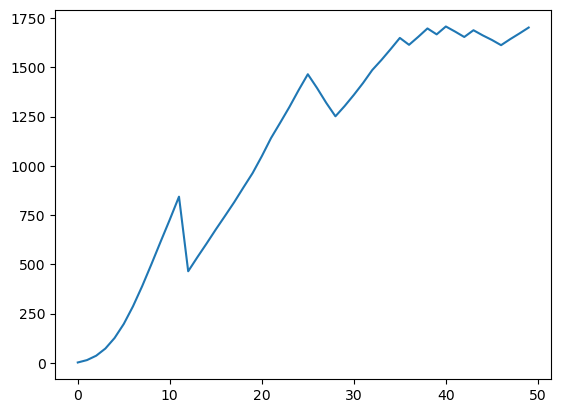

In [26]:
plt.plot(np.linspace(0,49,50), eurusd_histdata_dt_diffs_means)

In [27]:
eurusd_histdata_dt_diffs_means[:5]

[1.5539595786066567,
 13.645276814883541,
 35.857253316931725,
 72.31259846898111,
 125.83580165289257]

In [28]:
eurusd_histdata_dt_diff_counts_larger = eurusd_histdata_dt_diff_counts[eurusd_histdata_dt_diff_counts.index > timedelta(hours=1)]

In [29]:
eurusd_histdata_dt_diff_counts_larger

2 days 00:01:00    677
2 days 00:31:00     52
2 days 00:30:00     51
2 days 00:02:00     43
2 days 00:32:00     20
                  ... 
0 days 09:00:00      1
2 days 03:08:00      1
1 days 18:05:00      1
1 days 06:02:00      1
2 days 14:07:00      1
Name: <DT>, Length: 270, dtype: int64

In [30]:
(
    (eurusd_histdata_dt_diff_counts_larger.index.total_seconds() / 60).values *
    eurusd_histdata_dt_diff_counts_larger /
    eurusd_histdata_dt_diff_counts_larger.sum()
).sum()

2638.3301470588226

### Forextester

In [31]:
eurusd_forextester_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, ['EURUSD'])['EURUSD']

In [32]:
eurusd_forextester_df

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,2001-01-02 23:01:00,0.9507,0.9507,0.9507,0.9507
1,2001-01-02 23:02:00,0.9506,0.9506,0.9505,0.9505
2,2001-01-02 23:03:00,0.9505,0.9507,0.9505,0.9506
3,2001-01-02 23:04:00,0.9506,0.9506,0.9506,0.9506
4,2001-01-02 23:05:00,0.9506,0.9506,0.9506,0.9506
...,...,...,...,...,...
7720729,2022-09-30 18:55:00,0.9798,0.9798,0.9797,0.9798
7720730,2022-09-30 18:56:00,0.9798,0.9798,0.9798,0.9798
7720731,2022-09-30 18:57:00,0.9799,0.9801,0.9799,0.9799
7720732,2022-09-30 18:58:00,0.9800,0.9800,0.9799,0.9800


In [33]:
eurusd_forextester_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720734 entries, 0 to 7720733
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   <DT>     datetime64[ns]
 1   <OPEN>   float32       
 2   <HIGH>   float32       
 3   <LOW>    float32       
 4   <CLOSE>  float32       
dtypes: datetime64[ns](1), float32(4)
memory usage: 176.7 MB


In [34]:
eurusd_forextester_df.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
count,7.720734e+06,7.720734e+06,7.720734e+06,7.720734e+06
mean,1.219278e+00,1.219345e+00,1.219213e+00,1.219279e+00
std,1.479066e-01,1.479250e-01,1.478883e-01,1.479067e-01
min,8.350000e-01,8.350000e-01,8.350000e-01,8.350000e-01
25%,1.121500e+00,1.121600e+00,1.121500e+00,1.121500e+00
50%,1.215500e+00,1.215500e+00,1.215500e+00,1.215500e+00
75%,1.325500e+00,1.325600e+00,1.325500e+00,1.325500e+00
max,1.603300e+00,1.603600e+00,1.602700e+00,1.603400e+00


In [35]:
eurusd_forextester_df_melt = pd.melt(eurusd_forextester_df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']])

In [36]:
eurusd_forextester_df_melt['value'].value_counts().sort_index()

0.8350     9
0.8351     6
0.8352    17
0.8353    41
0.8354    63
          ..
1.6027     2
1.6028     2
1.6033     2
1.6034     1
1.6036     1
Name: value, Length: 7682, dtype: int64

In [37]:
eurusd_forextester_df.isna().sum()

<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64

In [38]:
eurusd_forextester_dt_counts = eurusd_forextester_df['<DT>'].value_counts()

In [39]:
eurusd_forextester_dt_counts

2001-01-02 23:01:00    1
2015-09-23 21:49:00    1
2015-09-23 22:01:00    1
2015-09-23 22:00:00    1
2015-09-23 21:59:00    1
                      ..
2008-09-11 06:32:00    1
2008-09-11 06:31:00    1
2008-09-11 06:30:00    1
2008-09-11 06:29:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7720734, dtype: int64

In [40]:
eurusd_forextester_dt_diff_counts = (eurusd_forextester_df['<DT>'] - eurusd_forextester_df['<DT>'].shift(1)).value_counts()

In [41]:
eurusd_forextester_dt_diff_counts

0 days 00:01:00    7582079
0 days 00:02:00      78783
0 days 00:03:00      26804
0 days 00:05:00      17937
0 days 00:04:00      13002
                    ...   
3 days 04:58:00          1
0 days 06:22:00          1
0 days 11:26:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 111, dtype: int64

In [42]:
sum((eurusd_forextester_dt_diff_counts.index.total_seconds() / 60).values * eurusd_forextester_dt_diff_counts)

11434798.000000002

In [43]:
eurusd_forextester_dt_diffs_means = []

In [44]:
for i in range(50):
    eurusd_forextester_dt_diffs_means.append((
        (eurusd_forextester_dt_diff_counts[i:].index.total_seconds() / 60).values *
        eurusd_forextester_dt_diff_counts[i:] /
        eurusd_forextester_dt_diff_counts[i:].sum()
    ).sum())

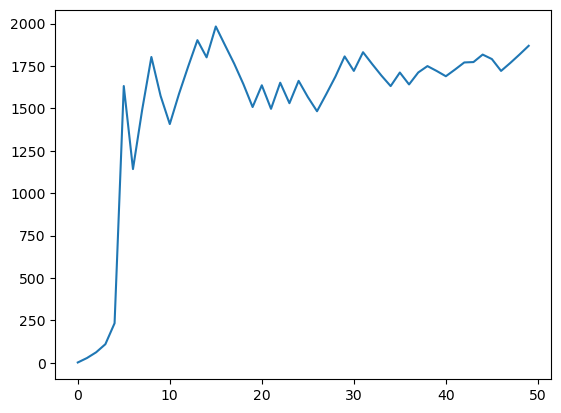

In [45]:
plt.plot(np.linspace(0,49,50), eurusd_forextester_dt_diffs_means)

In [46]:
eurusd_forextester_dt_diffs_means[:5]

[1.4810508276869574,
 27.786569446247498,
 61.718578276628094,
 109.31566214050261,
 232.98453403833443]

In [47]:
eurusd_forextester_dt_diff_counts_larger = eurusd_forextester_dt_diff_counts[eurusd_forextester_dt_diff_counts.index > timedelta(hours=1)]

In [48]:
eurusd_forextester_dt_diff_counts_larger

2 days 02:00:00    561
2 days 02:01:00    159
2 days 01:01:00     90
2 days 02:02:00     46
2 days 02:10:00     44
                  ... 
3 days 04:58:00      1
0 days 06:22:00      1
0 days 11:26:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 78, dtype: int64

In [49]:
(
    (eurusd_forextester_dt_diff_counts_larger.index.total_seconds() / 60).values *
    eurusd_forextester_dt_diff_counts_larger /
    eurusd_forextester_dt_diff_counts_larger.sum()
).sum()

2892.7332775919735

### Comparison

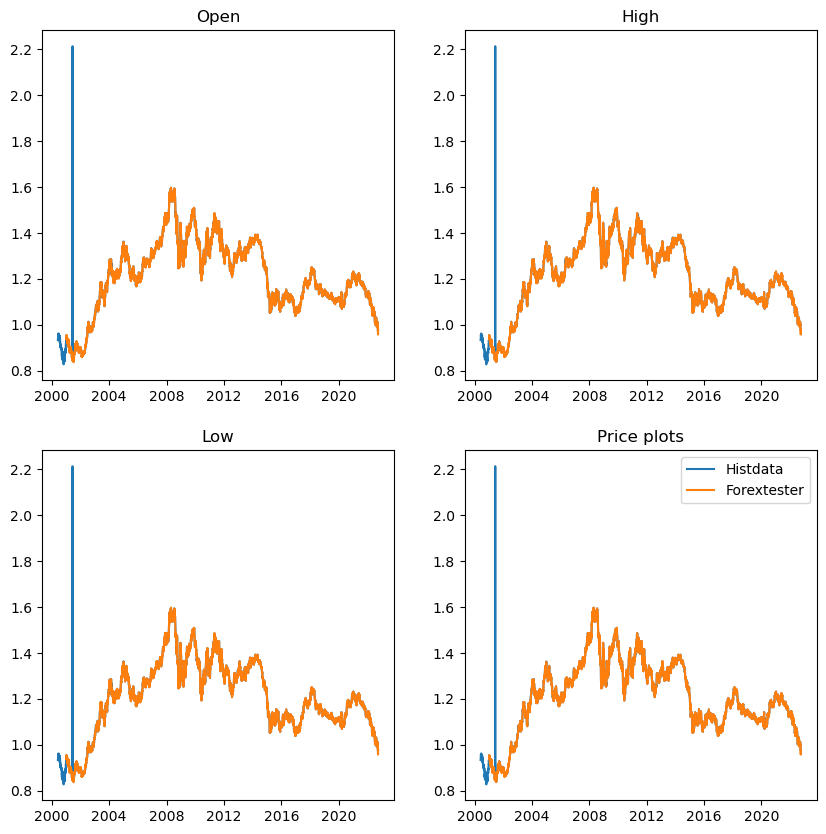

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(eurusd_histdata_df['<DT>'], eurusd_histdata_df['<OPEN>'].rolling(window=60*24).mean(), label='Histdata')
axs[0, 0].plot(eurusd_forextester_df['<DT>'], eurusd_forextester_df['<OPEN>'].rolling(window=60*24).mean(), label='Forextester')
axs[0, 0].set_title('Open')
axs[0, 1].plot(eurusd_histdata_df['<DT>'], eurusd_histdata_df['<HIGH>'].rolling(window=60*24).mean(), label='Histdata')
axs[0, 1].plot(eurusd_forextester_df['<DT>'], eurusd_forextester_df['<HIGH>'].rolling(window=60*24).mean(), label='Forextester')
axs[0, 1].set_title('High')
axs[1, 0].plot(eurusd_histdata_df['<DT>'], eurusd_histdata_df['<LOW>'].rolling(window=60*24).mean(), label='Histdata')
axs[1, 0].plot(eurusd_forextester_df['<DT>'], eurusd_forextester_df['<LOW>'].rolling(window=60*24).mean(), label='Forextester')
axs[1, 0].set_title('Low')
axs[1, 1].plot(eurusd_histdata_df['<DT>'], eurusd_histdata_df['<CLOSE>'].rolling(window=60*24).mean(), label='Histdata')
axs[1, 1].plot(eurusd_forextester_df['<DT>'], eurusd_forextester_df['<CLOSE>'].rolling(window=60*24).mean(), label='Forextester')
axs[1, 1].set_title('Close')
plt.title('Price plots')
plt.legend()

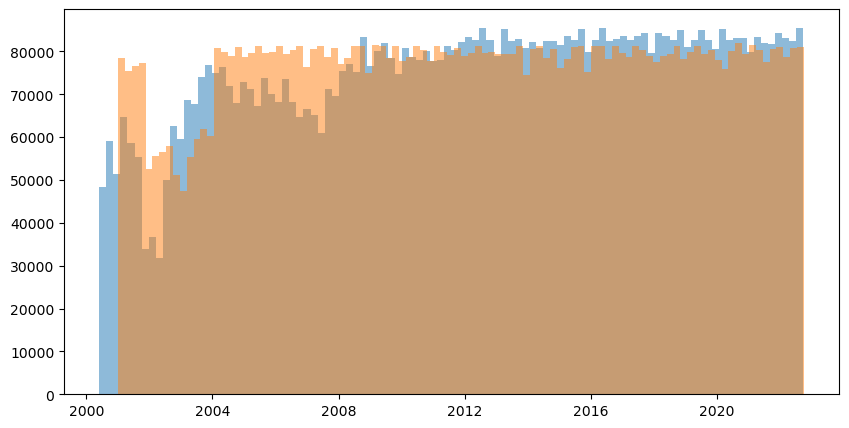

In [51]:
plt.figure(figsize=(10,5))
plt.hist(pd.Series(
    index=np.ones(len(eurusd_histdata_df)), 
    data=eurusd_histdata_df['<DT>'].values
), bins=100, alpha=0.5)
plt.hist(pd.Series(
    index=np.ones(len(eurusd_forextester_df)), 
    data=eurusd_forextester_df['<DT>'].values
), bins=100, alpha=0.5)
plt.show()

AUDJPY

Histdata start: 2002-08-19 17:32:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7240825

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7638554

Price value counts Histdata:


0.674000       3
0.674100       6
0.674200       4
0.674300       3
0.674400      15
              ..
136.220001     7
136.229996     1
136.240005     8
136.250000     4
136.259995     1
Name: value, Length: 47212, dtype: int64


Price value counts Forextester:


55.090000     1
55.099998     1
55.119999     2
55.250000     1
55.270000     1
             ..
107.800003    8
107.809998    5
107.820000    2
107.830002    1
107.839996    1
Name: value, Length: 5255, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2020-10-25 19:57:00    2
2020-10-25 19:06:00    2
2020-10-25 19:04:00    2
2020-10-25 19:03:00    2
2020-10-25 19:02:00    2
                      ..
2009-09-17 23:25:00    1
2009-09-17 23:24:00    1
2009-09-17 23:23:00    1
2009-09-17 23:22:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7240645, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-10-16 01:57:00    1
2015-10-16 02:09:00    1
2015-10-16 02:08:00    1
2015-10-16 02:07:00    1
                      ..
2008-10-29 06:30:00    1
2008-10-29 06:29:00    1
2008-10-29 06:28:00    1
2008-10-29 06:27:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7638554, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7092826
0 days 00:02:00     109663
0 days 00:03:00      22869
0 days 00:04:00       7068
0 days 00:05:00       2818
                    ...   
0 days 01:18:00          1
2 days 01:42:00          1
0 days 08:55:00          1
0 days 08:42:00          1
2 days 00:08:00          1
Name: <DT>, Length: 303, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7463560
0 days 00:02:00      99488
0 days 00:03:00      32204
0 days 00:05:00      23643
0 days 00:04:00      15389
                    ...   
4 days 02:12:00          1
2 days 03:21:00          1
0 days 00:45:00          1
2 days 02:20:00          1
1 days 23:01:00          1
Name: <DT>, Length: 144, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    590
2 days 00:02:00     94
2 days 00:30:00     38
2 days 00:31:00     36
2 days 00:03:00     30
                  ... 
0 days 01:18:00      1
2 days 01:42:00      1
0 days 08:55:00      1
0 days 08:42:00      1
2 days 00:08:00      1
Name: <DT>, Length: 243, dtype: int64

Mean: 2571.3601659751043

Datetime large diff value counts Forextester:


2 days 02:00:00    559
2 days 02:01:00    151
2 days 01:01:00     90
2 days 02:10:00     47
2 days 02:02:00     35
                  ... 
2 days 01:13:00      1
4 days 02:12:00      1
2 days 03:21:00      1
2 days 02:20:00      1
1 days 23:01:00      1
Name: <DT>, Length: 94, dtype: int64

Mean: 2880.253743760399



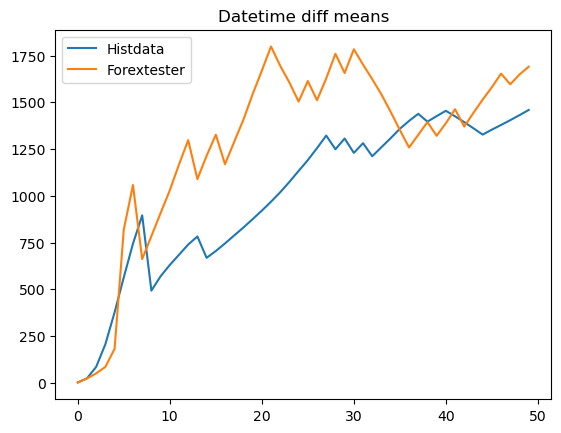

Datetime diff means head Histdata:
[1.4597186729024212, 23.49180394329653, 84.97232294248076, 206.1817535238588, 376.3437723267444]

Datetime diff means head Forextester:
[1.4969848346931678, 22.693696319281344, 49.96042646182372, 84.8860303457195, 180.96627327296773]



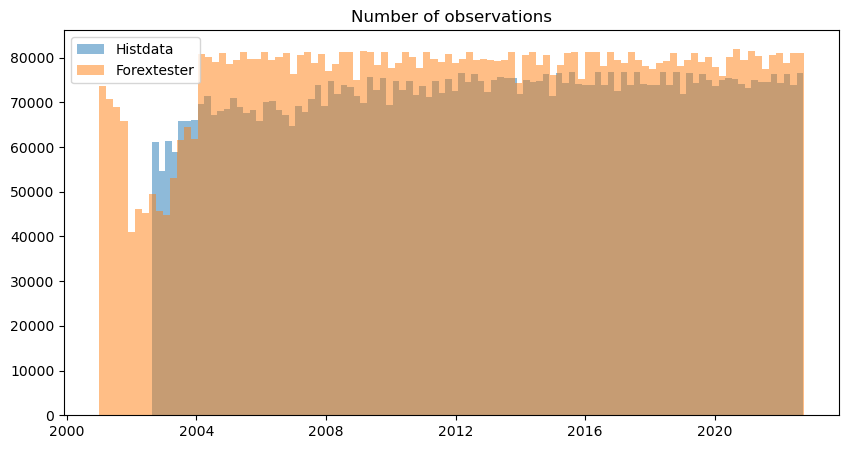

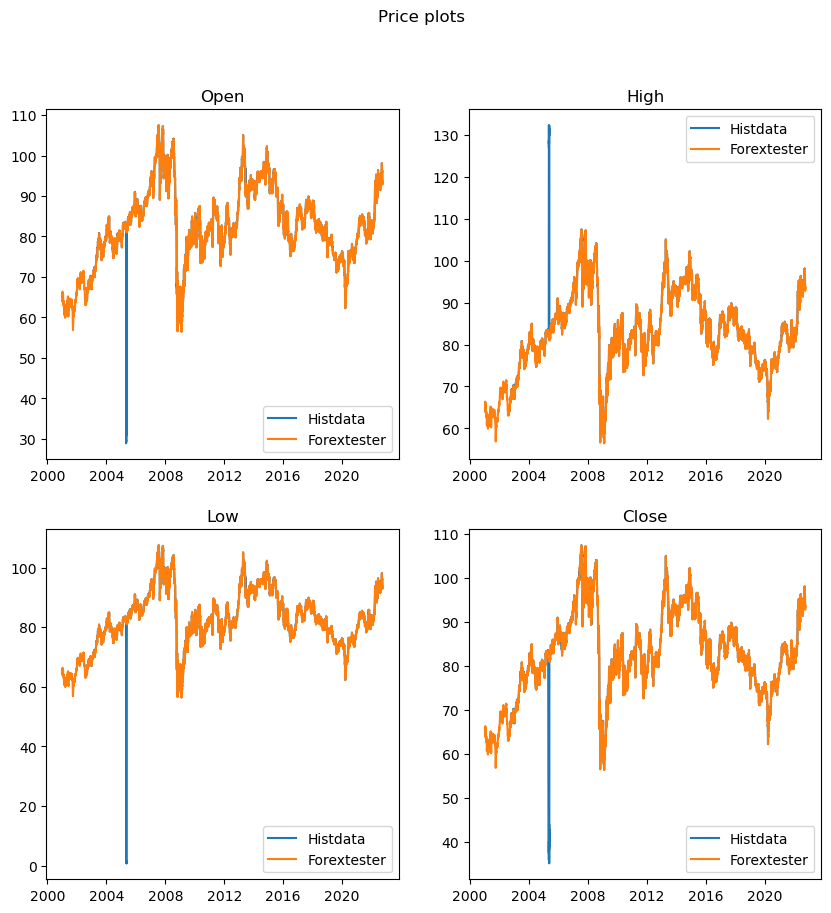



AUDUSD

Histdata start: 2000-06-05 12:03:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 6916574

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7469675

Price value counts Histdata:


0.100600     12
0.482500      8
0.482600      8
0.482700     23
0.482800     26
             ..
1.107600      3
1.107800      1
1.107900      3
4.098600      2
39.819698     2
Name: value, Length: 53287, dtype: int64


Price value counts Forextester:


0.4774     2
0.4775    28
0.4776    10
0.4777    10
0.4778     2
          ..
1.1074     5
1.1075     5
1.1076     2
1.1077     1
1.1078     3
Name: value, Length: 6305, dtype: int64


Anomal min price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
48,2000-08-04 18:36:00,0.5795,0.5795,0.5795,0.5795
49,2000-08-04 18:39:00,0.5790,0.5795,0.5790,0.5795
50,2000-08-06 17:24:00,0.1006,0.1006,0.1006,0.1006
51,2000-08-06 17:29:00,0.1006,0.1006,0.1006,0.1006
52,2000-08-06 17:31:00,0.1006,0.1006,0.1006,0.1006



Anomal max price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
703169,2004-11-24 10:03:00,0.789000,0.789100,0.7889,0.7891
703170,2004-11-24 10:04:00,0.789000,0.789100,0.7889,0.7890
703171,2004-11-24 10:05:00,39.819698,39.819698,0.7890,0.7892
703172,2004-11-24 10:06:00,0.789100,0.789300,0.7891,0.7892
703173,2004-11-24 10:07:00,0.789100,0.789200,0.7890,0.7890



NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2019-10-27 19:04:00    2
2020-10-25 19:10:00    2
2021-10-31 19:52:00    2
2021-10-31 19:54:00    2
2021-10-31 19:55:00    2
                      ..
2010-03-11 17:36:00    1
2010-03-11 17:35:00    1
2010-03-11 17:34:00    1
2010-03-11 17:33:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 6916394, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-12-15 02:59:00    1
2015-12-15 03:25:00    1
2015-12-15 03:24:00    1
2015-12-15 03:23:00    1
                      ..
2009-02-25 22:59:00    1
2009-02-25 22:58:00    1
2009-02-25 22:57:00    1
2009-02-25 22:56:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7469675, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    6501768
0 days 00:02:00     246557
0 days 00:03:00      78124
0 days 00:04:00      35146
0 days 00:05:00      18874
                    ...   
0 days 03:50:00          1
0 days 03:57:00          1
0 days 09:04:00          1
0 days 09:39:00          1
2 days 00:10:00          1
Name: <DT>, Length: 424, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7248500
0 days 00:02:00      97145
0 days 00:05:00      53451
0 days 00:03:00      41308
0 days 00:04:00      23305
                    ...   
2 days 01:12:00          1
0 days 01:00:00          1
2 days 00:03:00          1
2 days 03:21:00          1
2 days 22:01:00          1
Name: <DT>, Length: 135, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    639
2 days 00:02:00     68
2 days 00:31:00     46
2 days 00:30:00     28
2 days 00:03:00     26
                  ... 
0 days 03:50:00      1
0 days 03:57:00      1
0 days 09:04:00      1
0 days 09:39:00      1
2 days 00:10:00      1
Name: <DT>, Length: 364, dtype: int64

Mean: 2806.795309168443

Datetime large diff value counts Forextester:


2 days 02:00:00    559
2 days 02:01:00    148
2 days 01:01:00     90
2 days 02:10:00     47
2 days 02:09:00     39
                  ... 
2 days 03:06:00      1
2 days 01:12:00      1
2 days 00:03:00      1
2 days 03:21:00      1
2 days 22:01:00      1
Name: <DT>, Length: 92, dtype: int64

Mean: 2887.308590492077



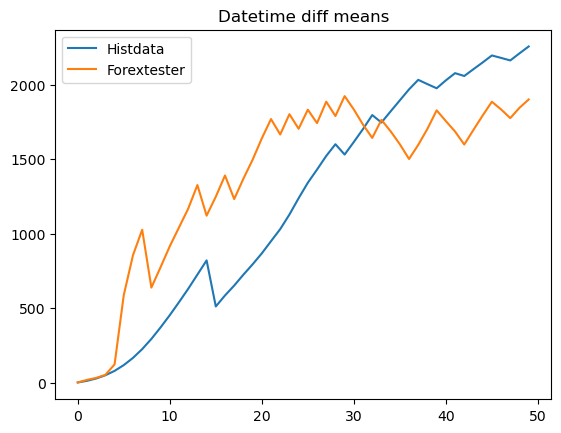

Datetime diff means head Histdata:
[1.6957957358362297, 12.60189004471981, 28.138301792591886, 49.92944165815988, 79.29093455564043]

Datetime diff means head Forextester:
[1.5308295917599621, 18.927622595784314, 32.18608551225923, 52.774986539714924, 123.02114793303723]



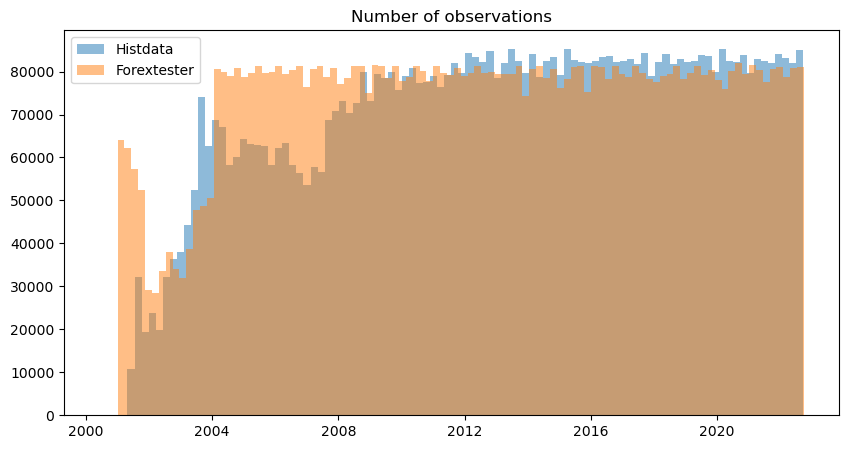

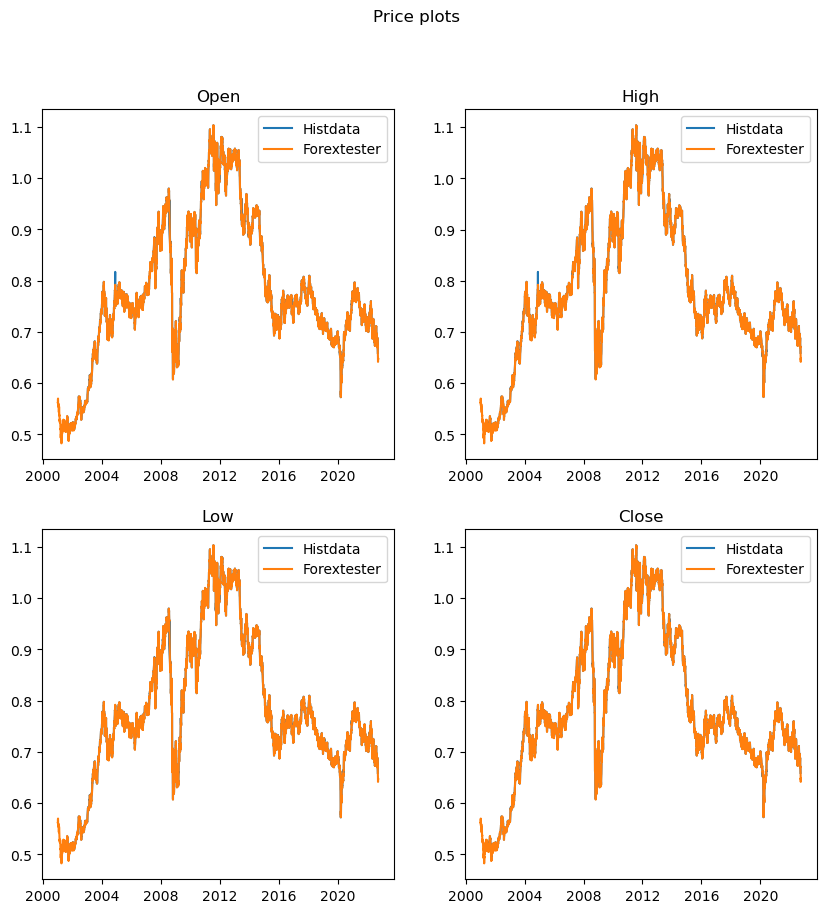



CHFJPY

Histdata start: 2002-08-19 17:39:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7250692

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7737905

Price value counts Histdata:


2.130600      2
75.099998     3
75.110001     4
75.120003     3
75.129997     6
             ..
151.391006    1
151.423996    1
151.434006    1
151.436005    1
151.453995    1
Name: value, Length: 71880, dtype: int64


Price value counts Forextester:


65.769997      2
65.790001      2
65.830002      4
65.839996      4
65.870003     16
              ..
151.350006     1
151.360001     2
151.369995     1
151.429993     2
151.440002     2
Name: value, Length: 8528, dtype: int64


Anomal min price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
161264,2003-02-25 11:37:00,86.510002,86.529999,86.489998,86.529999
161265,2003-02-25 11:38:00,86.519997,86.529999,86.510002,86.519997
161266,2003-02-25 11:45:00,2.130600,86.480003,2.130600,86.470001
161267,2003-02-25 11:46:00,86.459999,86.470001,86.449997,86.459999
161268,2003-02-25 11:48:00,86.470001,86.470001,86.459999,86.459999



NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:33:00    2
2019-10-27 19:00:00    2
2019-10-27 19:32:00    2
2019-10-27 19:33:00    2
2019-10-27 19:34:00    2
                      ..
2009-09-08 11:07:00    1
2009-09-08 11:06:00    1
2009-09-08 11:05:00    1
2009-09-08 11:04:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7250512, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-09-15 08:51:00    1
2015-09-15 09:03:00    1
2015-09-15 09:02:00    1
2015-09-15 09:01:00    1
                      ..
2008-08-25 22:22:00    1
2008-08-25 22:21:00    1
2008-08-25 22:20:00    1
2008-08-25 22:19:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7737905, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7113360
0 days 00:02:00     101277
0 days 00:03:00      20921
0 days 00:04:00       6728
0 days 00:05:00       2700
                    ...   
0 days 08:42:00          1
0 days 03:35:00          1
0 days 02:37:00          1
0 days 01:26:00          1
2 days 00:51:00          1
Name: <DT>, Length: 314, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7595115
0 days 00:02:00      91180
0 days 00:03:00      26215
0 days 00:05:00      12252
0 days 00:04:00      11171
                    ...   
0 days 00:34:00          1
0 days 06:22:00          1
0 days 11:28:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 114, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    439
2 days 00:02:00    124
2 days 00:07:00     46
2 days 00:30:00     37
2 days 00:31:00     37
                  ... 
0 days 08:42:00      1
0 days 03:35:00      1
0 days 02:37:00      1
0 days 01:26:00      1
2 days 00:51:00      1
Name: <DT>, Length: 253, dtype: int64

Mean: 2570.6699834162523

Datetime large diff value counts Forextester:


2 days 02:00:00    559
2 days 02:01:00    154
2 days 01:01:00     90
2 days 02:02:00     53
2 days 02:03:00     46
                  ... 
3 days 04:58:00      1
0 days 06:22:00      1
0 days 11:28:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 80, dtype: int64

Mean: 2890.8228905597325



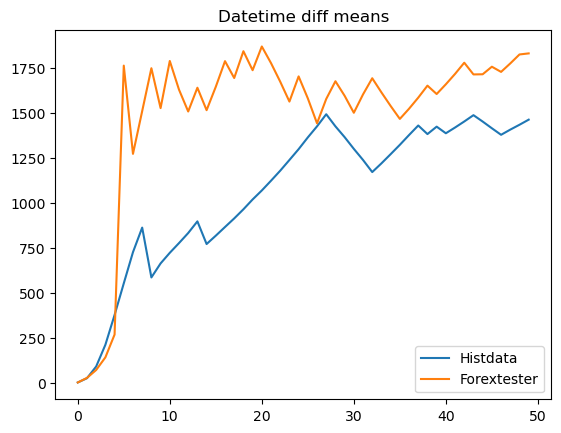

Datetime diff means head Histdata:
[1.45773127002654, 25.166925166204273, 90.24366228435125, 210.85587788277275, 376.43902439024396]

Datetime diff means head Forextester:
[1.4777642627771028, 26.890607819930104, 70.86599236567267, 140.92612428132628, 267.64708567950083]



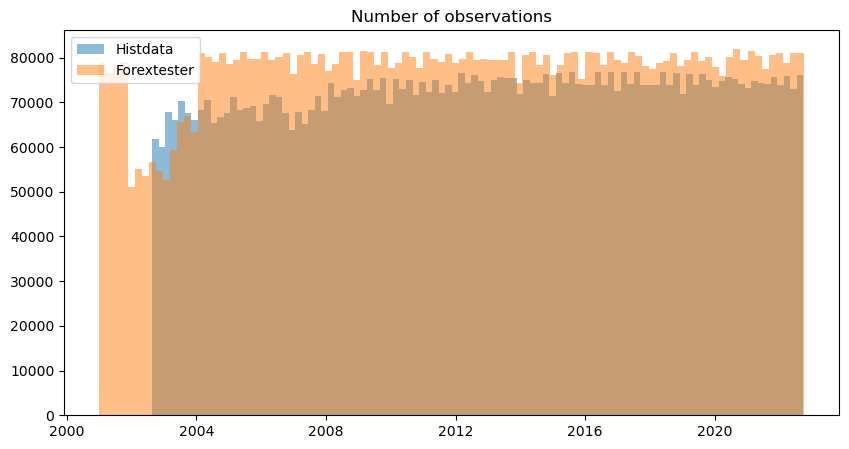

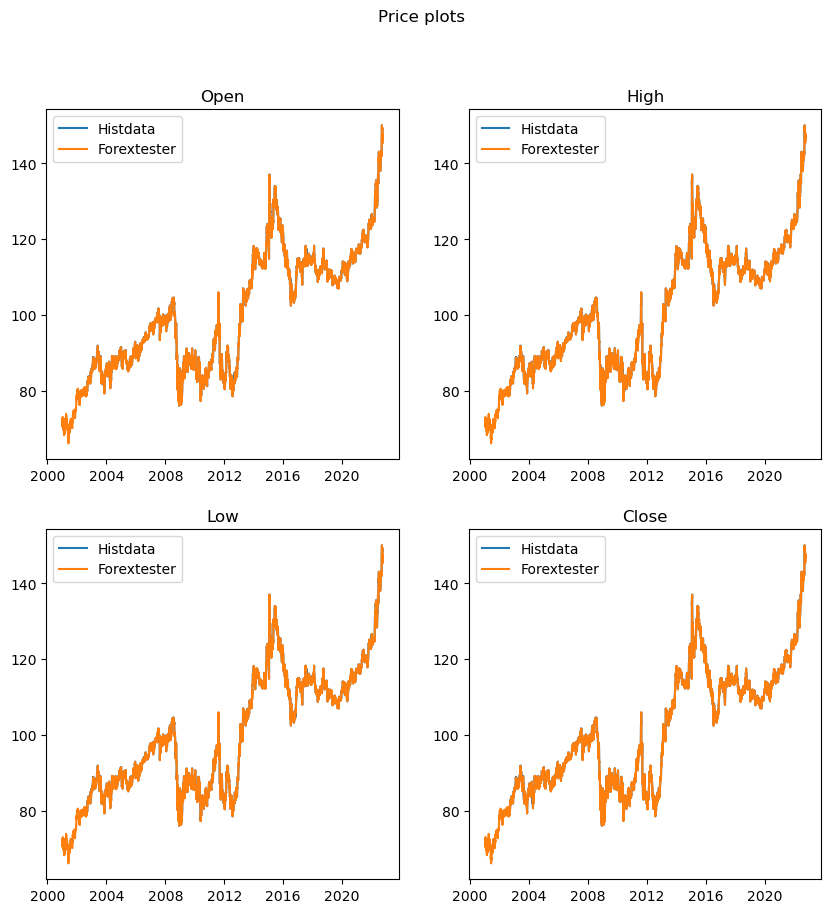



EURCAD

Histdata start: 2007-03-18 17:00:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 5722710

Forextester start: 2001-01-02 23:07:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7732531

Price value counts Histdata:


1.21268    1
1.21269    1
1.21275    1
1.21276    1
1.21278    1
          ..
1.75080    1
1.75090    5
1.75110    1
1.75170    1
1.75180    1
Name: value, Length: 41588, dtype: int64


Price value counts Forextester:


1.2124     4
1.2125    12
1.2126    18
1.2127    38
1.2128    49
          ..
1.7496     4
1.7497     5
1.7498     5
1.7499     1
1.7501     3
Name: value, Length: 5377, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:12:00    2
2021-10-31 19:36:00    2
2021-10-31 19:38:00    2
2021-10-31 19:39:00    2
2021-10-31 19:40:00    2
                      ..
2012-06-22 00:05:00    1
2012-06-22 00:04:00    1
2012-06-22 00:03:00    1
2012-06-22 00:02:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 5722530, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:07:00    1
2015-09-16 16:39:00    1
2015-09-16 16:51:00    1
2015-09-16 16:50:00    1
2015-09-16 16:49:00    1
                      ..
2008-08-28 20:19:00    1
2008-08-28 20:18:00    1
2008-08-28 20:17:00    1
2008-08-28 20:16:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7732531, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    5673579
0 days 00:02:00      37205
0 days 00:03:00       7011
0 days 00:04:00       2182
0 days 00:05:00        852
                    ...   
1 days 14:02:00          1
1 days 14:52:00          1
1 days 01:01:00          1
2 days 22:03:00          1
0 days 00:29:00          1
Name: <DT>, Length: 90, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7601506
0 days 00:02:00      79574
0 days 00:03:00      23459
0 days 00:05:00      14686
0 days 00:04:00      10038
                    ...   
2 days 03:04:00          1
2 days 01:12:00          1
0 days 01:01:00          1
4 days 02:07:00          1
2 days 22:01:00          1
Name: <DT>, Length: 145, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    545
2 days 00:02:00     83
2 days 00:03:00     40
2 days 00:06:00     27
2 days 00:04:00     21
2 days 00:05:00     16
2 days 00:00:00     11
2 days 00:11:00     10
2 days 01:01:00      7
2 days 00:07:00      7
1 days 23:01:00      5
2 days 00:13:00      5
2 days 00:08:00      4
0 days 01:01:00      4
3 days 00:03:00      2
2 days 09:03:00      2
1 days 00:02:00      2
2 days 00:14:00      2
3 days 00:02:00      2
3 days 03:11:00      1
0 days 14:04:00      1
1 days 00:08:00      1
0 days 16:02:00      1
2 days 00:31:00      1
2 days 14:11:00      1
2 days 13:01:00      1
0 days 14:03:00      1
2 days 00:12:00      1
0 days 19:01:00      1
0 days 02:59:00      1
0 days 20:01:00      1
1 days 23:03:00      1
1 days 23:11:00      1
2 days 00:16:00      1
2 days 00:17:00      1
2 days 01:45:00      1
0 days 20:03:00      1
1 days 04:00:00      1
0 days 03:35:00      1
1 days 09:05:00      1
1 days 02:17:00      1
2 days 00:25:00      1
1 days 13:59:00      1
1 days 03:0

Mean: 2852.0216346153848

Datetime large diff value counts Forextester:


2 days 02:00:00    560
2 days 02:01:00    159
2 days 01:01:00     90
2 days 02:03:00     47
2 days 02:02:00     47
                  ... 
2 days 03:04:00      1
2 days 01:12:00      1
0 days 01:01:00      1
4 days 02:07:00      1
2 days 22:01:00      1
Name: <DT>, Length: 92, dtype: int64

Mean: 2879.9392678868553



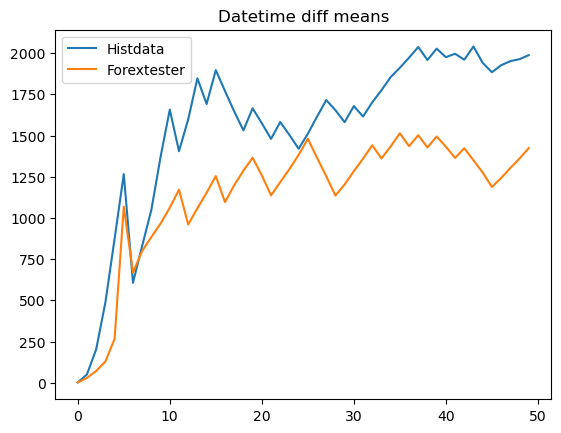

Datetime diff means head Histdata:
[1.426233275184882, 50.6480561774883, 202.42591194968549, 486.95482295482293, 872.6822840409956]

Datetime diff means head Forextester:
[1.478790512290286, 29.256365246061794, 71.41181729834791, 128.747133007038, 265.33866967305516]



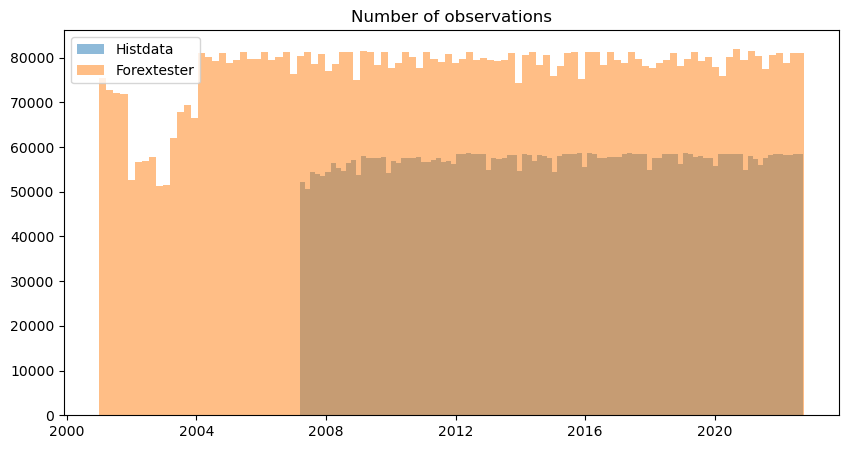

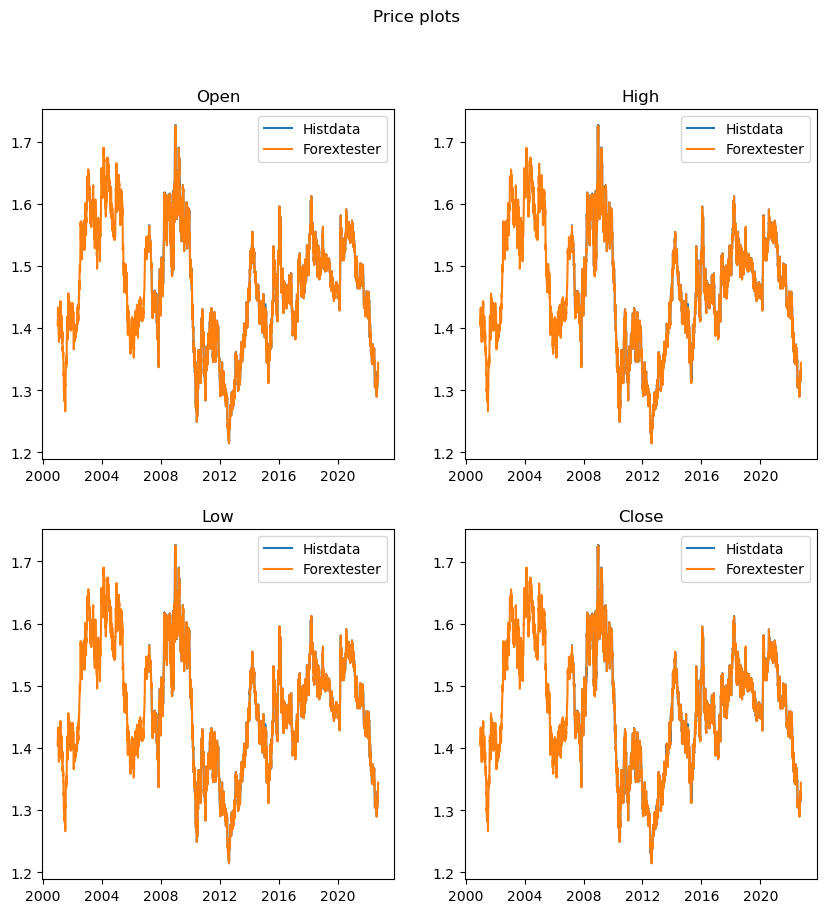



EURCHF

Histdata start: 2002-01-14 12:37:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 6761940

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7779370

Price value counts Histdata:


0.94653     1
0.94656     1
0.94661     2
0.94680     1
0.94684     1
           ..
1.68260    19
1.68270     8
1.68280     4
1.68290     5
1.68300     1
Name: value, Length: 35788, dtype: int64


Price value counts Forextester:


0.9414     4
0.9432     7
0.9433    13
0.9434     6
0.9435    15
          ..
1.6822    13
1.6823    10
1.6824     4
1.6825     2
1.6826     2
Name: value, Length: 7396, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2019-10-27 19:50:00    2
2020-10-25 19:00:00    2
2020-10-25 19:32:00    2
2020-10-25 19:33:00    2
2020-10-25 19:34:00    2
                      ..
2010-04-07 18:00:00    1
2010-04-07 17:59:00    1
2010-04-07 17:58:00    1
2010-04-07 17:57:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 6761760, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-09-01 00:55:00    1
2015-09-01 01:07:00    1
2015-09-01 01:06:00    1
2015-09-01 01:05:00    1
                      ..
2008-07-28 07:42:00    1
2008-07-28 07:41:00    1
2008-07-28 07:40:00    1
2008-07-28 07:39:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7779370, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    6377267
0 days 00:02:00     233270
0 days 00:03:00      69039
0 days 00:04:00      31294
0 days 00:05:00      15937
                    ...   
1 days 05:57:00          1
0 days 06:51:00          1
0 days 07:51:00          1
0 days 06:55:00          1
2 days 01:06:00          1
Name: <DT>, Length: 421, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7659777
0 days 00:02:00      78290
0 days 00:03:00      20995
0 days 00:05:00       9514
0 days 00:04:00       8800
                    ...   
0 days 06:22:00          1
0 days 11:28:00          1
2 days 09:01:00          1
1 days 06:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 114, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    504
2 days 00:02:00    100
2 days 00:03:00     46
2 days 00:31:00     37
2 days 00:30:00     24
                  ... 
1 days 05:57:00      1
0 days 06:51:00      1
0 days 07:51:00      1
0 days 06:55:00      1
2 days 01:06:00      1
Name: <DT>, Length: 360, dtype: int64

Mean: 2407.9978070175443

Datetime large diff value counts Forextester:


2 days 02:00:00    561
2 days 02:01:00    152
2 days 01:01:00     91
2 days 02:02:00     57
2 days 02:03:00     48
                  ... 
0 days 06:22:00      1
0 days 11:28:00      1
2 days 09:01:00      1
1 days 06:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 77, dtype: int64

Mean: 2895.4979079497907



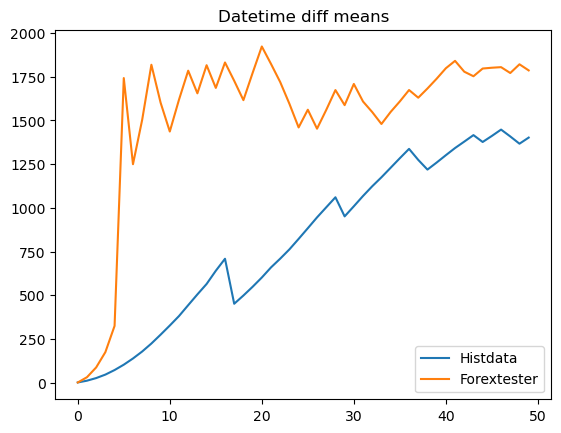

Datetime diff means head Histdata:
[1.6093521399705024, 11.711468471840945, 26.674244725961344, 46.51866736277211, 72.5732048796726]

Datetime diff means head Forextester:
[1.4698875962819096, 31.565832162686466, 87.609340952012, 175.08524154232532, 325.0149170758826]



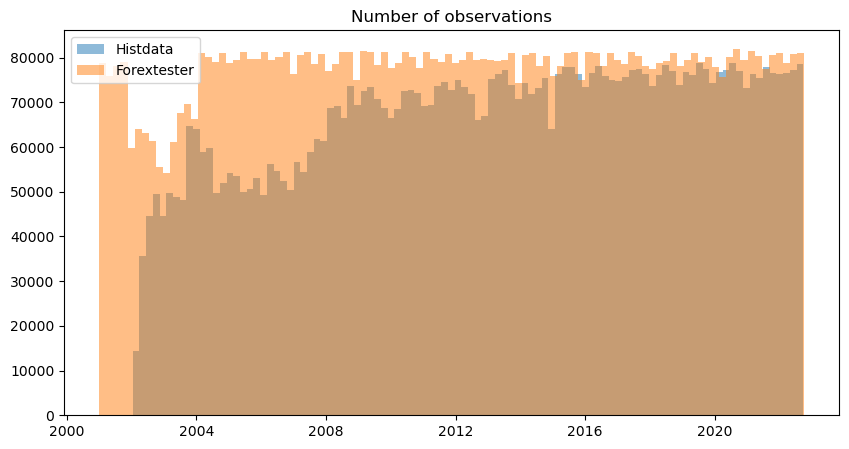

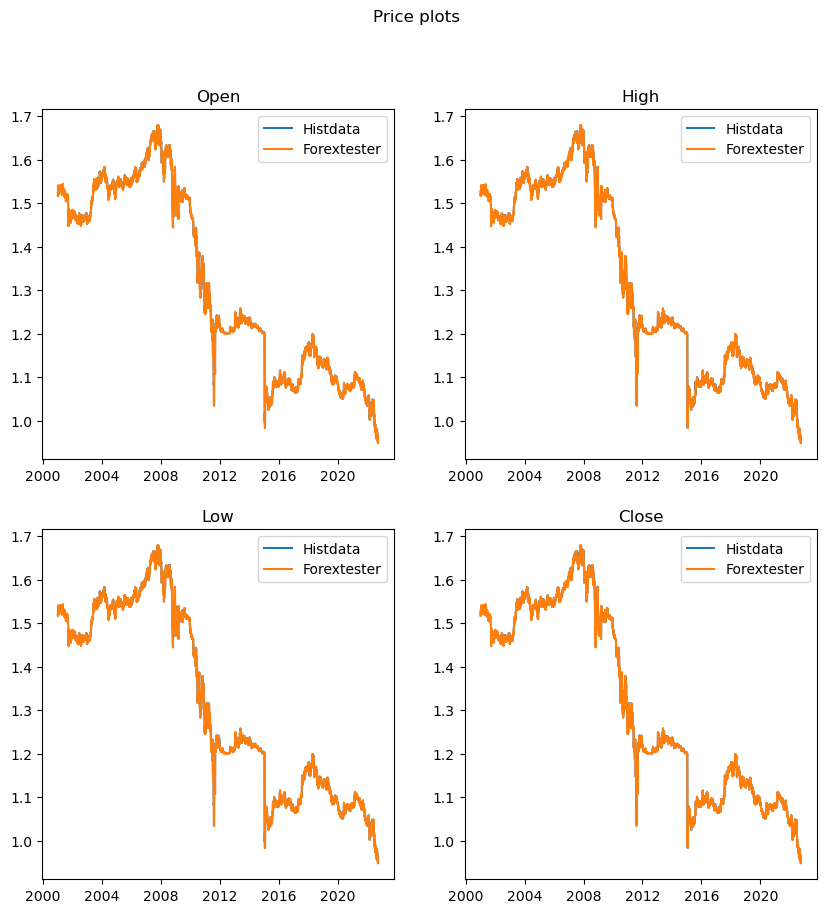



EURGBP

Histdata start: 2002-03-03 19:04:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 6836317

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7627759

Price value counts Histdata:


0.6000     2
0.6091     5
0.6092    14
0.6093    29
0.6094    72
          ..
0.9802     2
0.9803     2
0.9805     3
1.2368     2
1.2369     2
Name: value, Length: 26562, dtype: int64


Price value counts Forextester:


0.5954     25
0.5955     66
0.5956     88
0.5957    115
0.5958    213
         ... 
0.9796     30
0.9797      3
0.9798      3
0.9800      1
0.9801      3
Name: value, Length: 3847, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:17:00    2
2019-10-27 19:44:00    2
2020-10-25 19:55:00    2
2020-10-25 19:56:00    2
2020-10-25 19:57:00    2
                      ..
2010-04-06 12:22:00    1
2010-04-06 12:21:00    1
2010-04-06 12:20:00    1
2010-04-06 12:19:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 6836137, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-10-21 02:21:00    1
2015-10-21 02:33:00    1
2015-10-21 02:32:00    1
2015-10-21 02:31:00    1
                      ..
2008-11-04 12:42:00    1
2008-11-04 12:41:00    1
2008-11-04 12:40:00    1
2008-11-04 12:39:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7627759, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    6449296
0 days 00:02:00     240149
0 days 00:03:00      71128
0 days 00:04:00      30591
0 days 00:05:00      15682
                    ...   
0 days 03:30:00          1
0 days 01:51:00          1
0 days 13:24:00          1
0 days 09:23:00          1
2 days 00:14:00          1
Name: <DT>, Length: 407, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7446918
0 days 00:02:00      98446
0 days 00:03:00      33666
0 days 00:05:00      29126
0 days 00:04:00      17337
                    ...   
1 days 06:02:00          1
2 days 03:06:00          1
2 days 02:16:00          1
1 days 00:03:00          1
1 days 23:01:00          1
Name: <DT>, Length: 121, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    521
2 days 00:02:00    103
2 days 00:03:00     48
2 days 00:31:00     33
2 days 00:30:00     29
                  ... 
0 days 03:30:00      1
0 days 01:51:00      1
0 days 13:24:00      1
0 days 09:23:00      1
2 days 00:14:00      1
Name: <DT>, Length: 347, dtype: int64

Mean: 2419.084337349397

Datetime large diff value counts Forextester:


2 days 02:00:00    560
2 days 02:01:00    152
2 days 01:01:00     90
2 days 02:02:00     44
2 days 02:03:00     41
                  ... 
1 days 06:02:00      1
2 days 03:06:00      1
2 days 02:16:00      1
1 days 00:03:00      1
1 days 23:01:00      1
Name: <DT>, Length: 83, dtype: int64

Mean: 2890.9540517961577



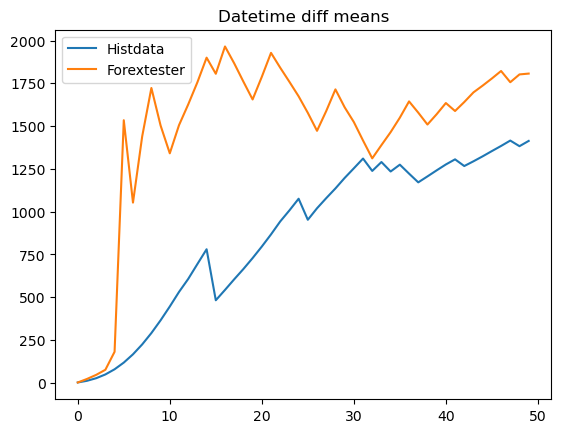

Datetime diff means head Histdata:
[1.5816755691223174, 11.274709317347941, 26.439800913727012, 48.45142125344917, 78.56777108433737]

Datetime diff means head Forextester:
[1.499103406269575, 22.051979650519797, 46.01048620045151, 75.72627647348548, 180.8162432404857]



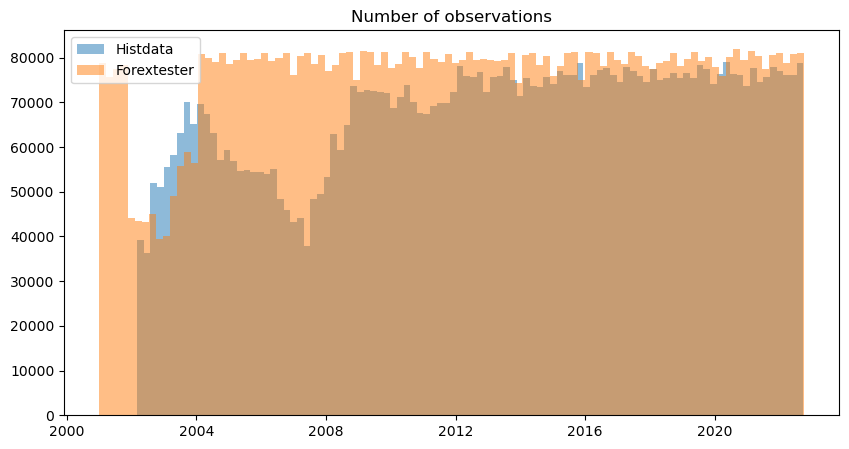

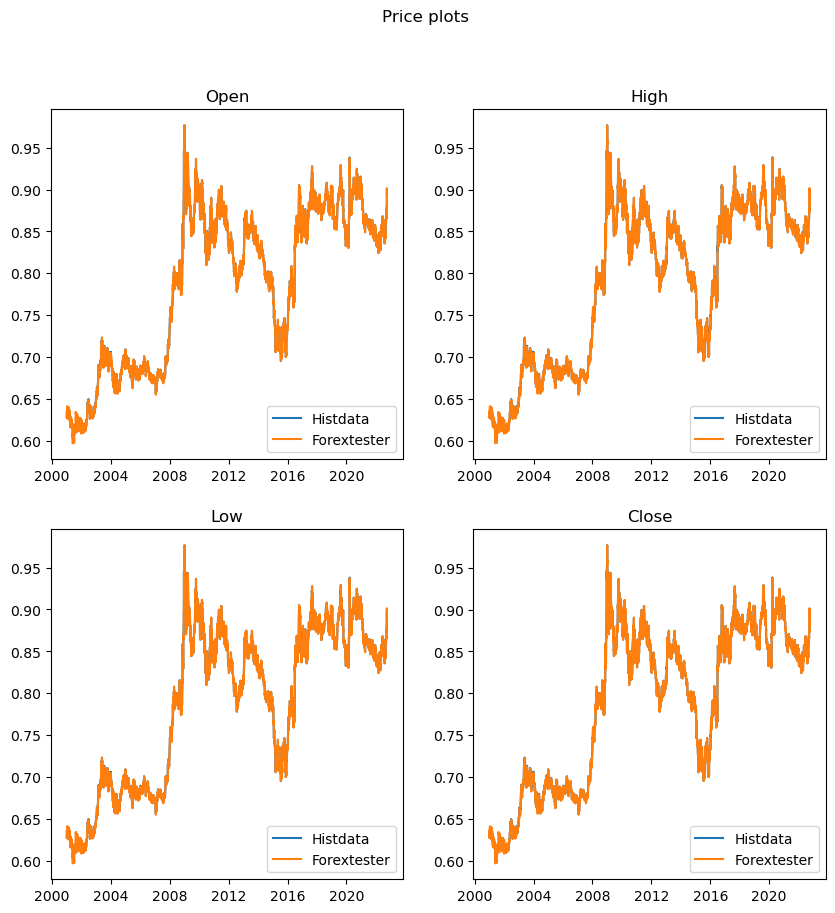



EURJPY

Histdata start: 2002-03-03 19:03:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7400861

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7788103

Price value counts Histdata:


67.250000     2
67.510002     1
67.980003     1
94.105003     1
94.111000     1
             ..
169.960007    4
169.970001    2
169.979996    4
169.990005    5
170.000000    2
Name: value, Length: 57548, dtype: int64


Price value counts Forextester:


94.099998      3
94.110001      2
94.120003      3
94.129997     14
94.139999     29
              ..
169.919998     5
169.929993     3
169.940002     2
169.949997     1
169.960007     1
Name: value, Length: 7587, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:30:00    2
2019-10-27 19:06:00    2
2021-10-31 19:09:00    2
2021-10-31 19:08:00    2
2021-10-31 19:07:00    2
                      ..
2009-06-08 11:26:00    1
2009-06-08 11:25:00    1
2009-06-08 11:24:00    1
2009-06-08 11:23:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7400681, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-08-31 11:30:00    1
2015-08-31 11:42:00    1
2015-08-31 11:41:00    1
2015-08-31 11:40:00    1
                      ..
2008-07-24 18:59:00    1
2008-07-24 18:58:00    1
2008-07-24 18:57:00    1
2008-07-24 18:56:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7788103, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7272963
0 days 00:02:00      94745
0 days 00:03:00      19353
0 days 00:04:00       6150
0 days 00:05:00       2381
                    ...   
0 days 11:11:00          1
0 days 05:31:00          1
0 days 01:44:00          1
0 days 03:07:00          1
2 days 00:16:00          1
Name: <DT>, Length: 384, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7668904
0 days 00:02:00      81137
0 days 00:03:00      20710
0 days 00:04:00       7923
0 days 00:05:00       7356
                    ...   
0 days 00:18:00          1
0 days 06:22:00          1
0 days 11:26:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 112, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    526
2 days 00:02:00    116
2 days 00:30:00     51
2 days 00:31:00     42
2 days 00:03:00     23
                  ... 
0 days 11:11:00      1
0 days 05:31:00      1
0 days 01:44:00      1
0 days 03:07:00      1
2 days 00:16:00      1
Name: <DT>, Length: 324, dtype: int64

Mean: 2446.9771341463415

Datetime large diff value counts Forextester:


2 days 02:00:00    558
2 days 02:01:00    162
2 days 01:01:00     90
2 days 02:03:00     51
2 days 02:02:00     46
                  ... 
3 days 04:58:00      1
0 days 06:22:00      1
0 days 11:26:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 74, dtype: int64

Mean: 2897.394472361809



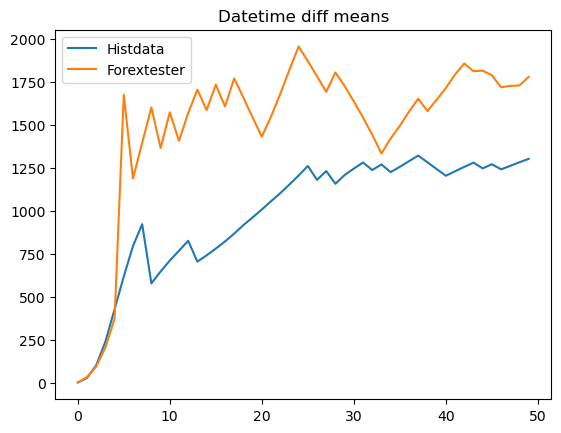

Datetime diff means head Histdata:
[1.4610241242234012, 27.677521755787865, 101.0612331081081, 238.5914196680919, 427.2091776702836]

Datetime diff means head Forextester:
[1.4682393733415415, 31.59360056376785, 94.68011875673263, 204.10869690507747, 372.27386508273224]



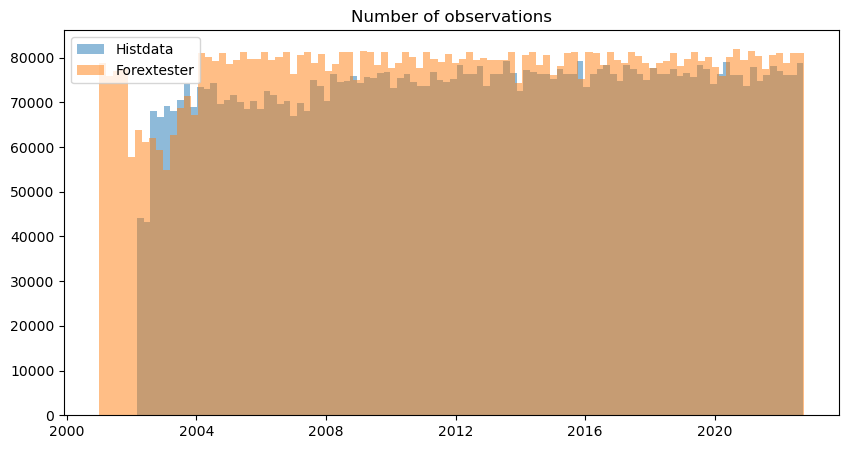

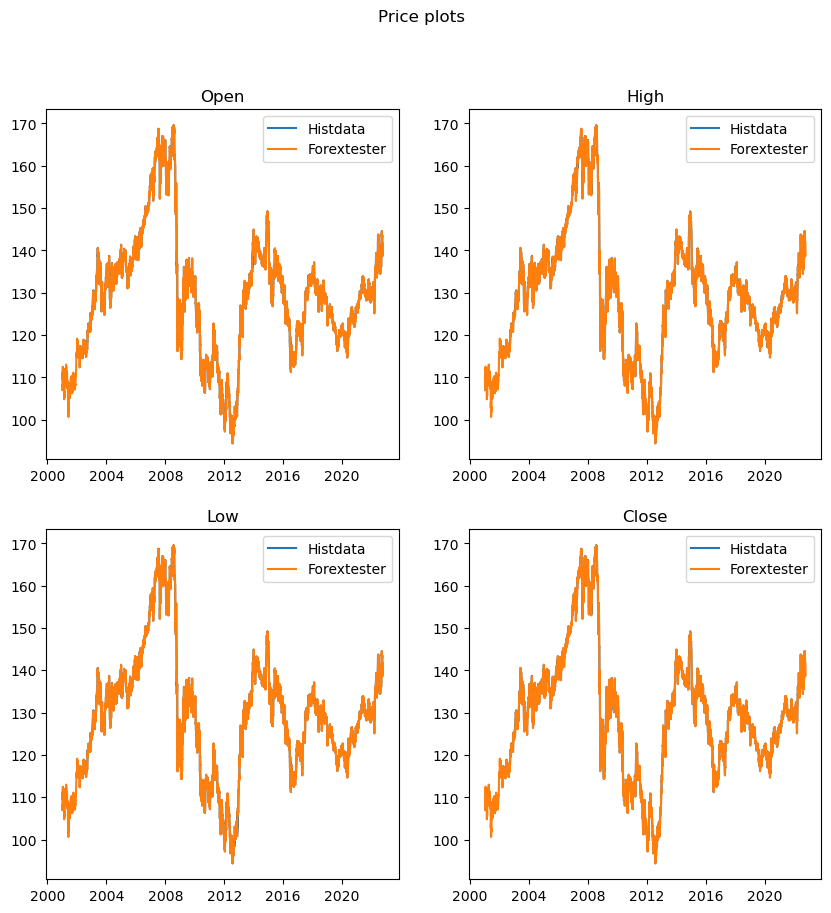



EURUSD

Histdata start: 2000-05-30 17:27:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7553409

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7720734

Price value counts Histdata:


-0.000100        4
 0.822900        1
 0.823200        4
 0.823300        6
 0.823400       17
                ..
 1.603300        1
 1.603600        1
 1.603800        2
 1.604100        1
 1965.000122     4
Name: value, Length: 46083, dtype: int64


Price value counts Forextester:


0.8350     9
0.8351     6
0.8352    17
0.8353    41
0.8354    63
          ..
1.6027     2
1.6028     2
1.6033     2
1.6034     1
1.6036     1
Name: value, Length: 7682, dtype: int64


Anomal min price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
323921,2001-09-11 18:25:00,0.9111,0.9111,0.9110,0.9110
323922,2001-09-11 18:26:00,0.9109,0.9109,0.9108,0.9108
323923,2001-09-11 20:12:00,-0.0001,-0.0001,-0.0001,-0.0001
323924,2001-09-11 21:23:00,0.9109,0.9109,0.9108,0.9108
323925,2001-09-11 21:26:00,0.9107,0.9107,0.9106,0.9106



Anomal max price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
258760,2001-06-07 23:26:00,0.848600,0.848600,0.848500,0.848500
258761,2001-06-07 23:31:00,0.848600,0.848600,0.848600,0.848600
258762,2001-06-07 23:32:00,1965.000122,1965.000122,1965.000122,1965.000122
258763,2001-06-07 23:43:00,0.848600,0.848600,0.848600,0.848600
258764,2001-06-07 23:45:00,0.848700,0.848800,0.848700,0.848800



NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2020-10-25 19:34:00    2
2019-10-27 19:58:00    2
2020-10-25 19:27:00    2
2020-10-25 19:26:00    2
2020-10-25 19:25:00    2
                      ..
2009-01-19 06:12:00    1
2009-01-19 06:11:00    1
2009-01-19 06:10:00    1
2009-01-19 06:09:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7553229, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-09-23 21:49:00    1
2015-09-23 22:01:00    1
2015-09-23 22:00:00    1
2015-09-23 21:59:00    1
                      ..
2008-09-11 06:32:00    1
2008-09-11 06:31:00    1
2008-09-11 06:30:00    1
2008-09-11 06:29:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7720734, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7222339
0 days 00:02:00     217079
0 days 00:03:00      59859
0 days 00:04:00      23701
0 days 00:05:00      11239
                    ...   
2 days 03:08:00          1
1 days 18:05:00          1
1 days 06:02:00          1
2 days 00:39:00          1
2 days 14:07:00          1
Name: <DT>, Length: 331, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7582079
0 days 00:02:00      78783
0 days 00:03:00      26804
0 days 00:05:00      17937
0 days 00:04:00      13002
                    ...   
3 days 04:58:00          1
0 days 06:22:00          1
0 days 11:26:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 111, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    677
2 days 00:31:00     52
2 days 00:30:00     51
2 days 00:02:00     43
2 days 00:32:00     20
                  ... 
2 days 03:08:00      1
1 days 18:05:00      1
1 days 06:02:00      1
2 days 00:39:00      1
2 days 14:07:00      1
Name: <DT>, Length: 270, dtype: int64

Mean: 2638.3301470588235

Datetime large diff value counts Forextester:


2 days 02:00:00    561
2 days 02:01:00    159
2 days 01:01:00     90
2 days 02:02:00     46
2 days 02:10:00     44
                  ... 
3 days 04:58:00      1
0 days 06:22:00      1
0 days 11:26:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 78, dtype: int64

Mean: 2892.7332775919735



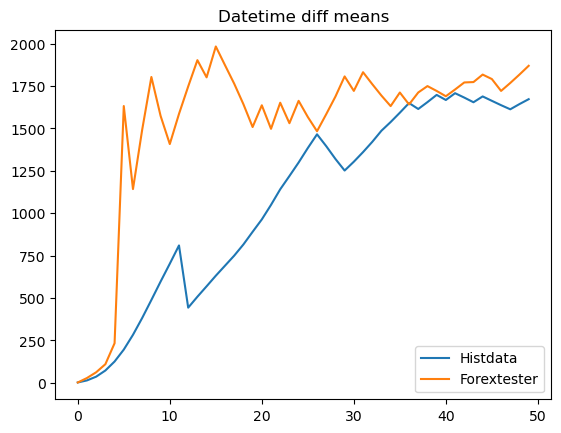

Datetime diff means head Histdata:
[1.553922547279321, 13.637857969184672, 35.80063163435389, 72.07213980898192, 125.09145580019714]

Datetime diff means head Forextester:
[1.4810508276869574, 27.786569446247498, 61.718578276628094, 109.31566214050261, 232.98453403833443]



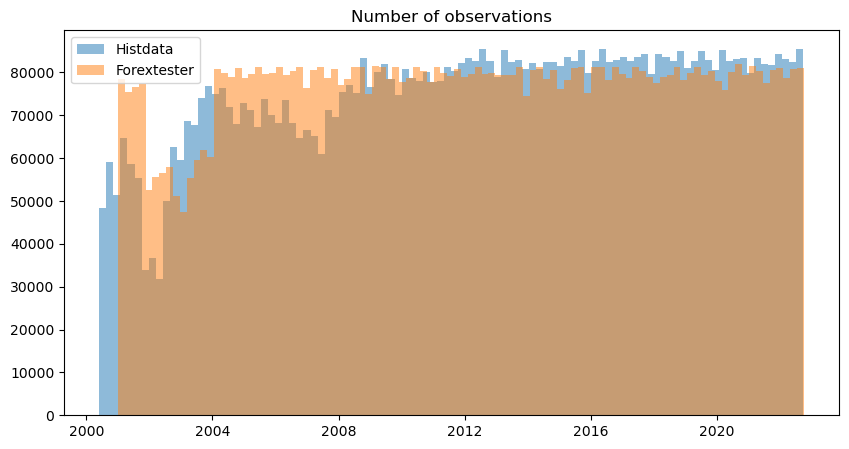

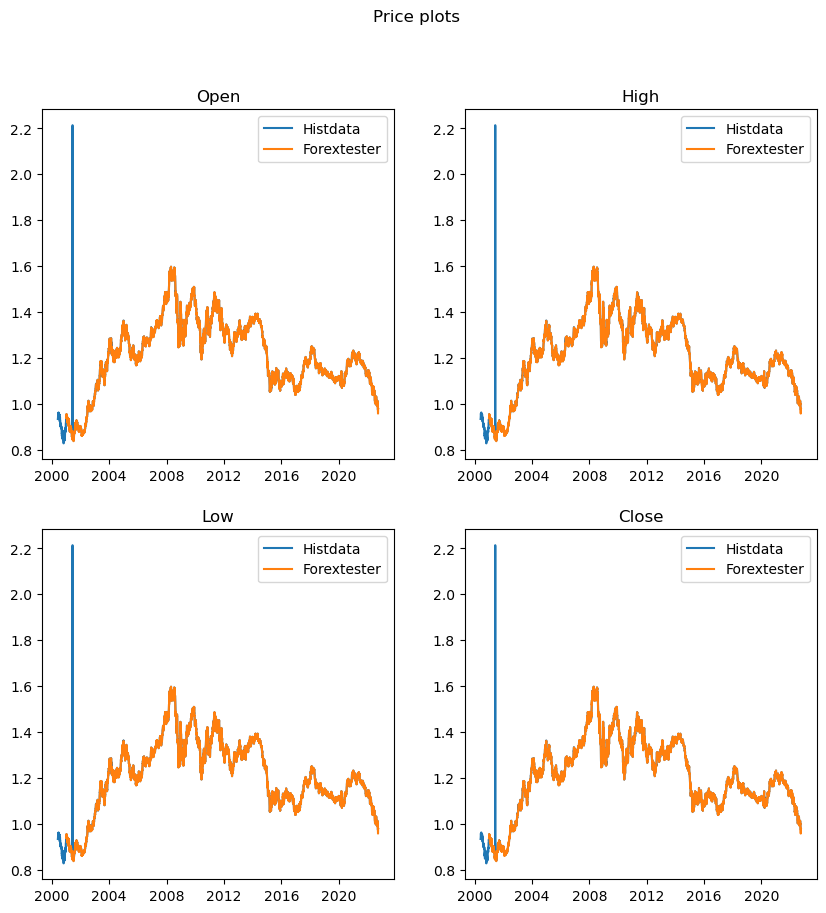



GBPCHF

Histdata start: 2002-08-19 17:37:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7290716

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7836746

Price value counts Histdata:


1.063630      1
1.063690      1
1.063820      1
1.063850      1
1.063950      1
             ..
2.497100      3
2.497200      1
121.208702    1
121.208900    4
121.209000    1
Name: value, Length: 57533, dtype: int64


Price value counts Forextester:


1.0205    4
1.0214    4
1.0240    4
1.0256    4
1.0288    1
         ..
2.5536    2
2.5539    1
2.5540    1
2.5541    4
2.5542    2
Name: value, Length: 15235, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2019-10-27 19:16:00    2
2021-10-31 19:15:00    2
2021-10-31 19:44:00    2
2021-10-31 19:45:00    2
2021-10-31 19:46:00    2
                      ..
2009-08-11 11:53:00    1
2009-08-11 11:52:00    1
2009-08-11 11:51:00    1
2009-08-11 11:50:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7290536, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-08-13 13:45:00    1
2015-08-13 13:57:00    1
2015-08-13 13:56:00    1
2015-08-13 13:55:00    1
                      ..
2008-06-23 05:02:00    1
2008-06-23 05:01:00    1
2008-06-23 05:00:00    1
2008-06-23 04:59:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7836746, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7194944
0 days 00:02:00      71096
0 days 00:03:00      13614
0 days 00:04:00       4247
0 days 00:05:00       1789
                    ...   
0 days 06:14:00          1
0 days 01:46:00          1
0 days 20:32:00          1
1 days 03:51:00          1
2 days 00:15:00          1
Name: <DT>, Length: 327, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7748654
0 days 00:02:00      60928
0 days 00:03:00      14431
0 days 00:04:00       5563
0 days 00:05:00       5196
                    ...   
2 days 00:02:00          1
1 days 00:03:00          1
2 days 03:04:00          1
0 days 00:46:00          1
2 days 22:01:00          1
Name: <DT>, Length: 119, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    374
2 days 00:02:00    183
2 days 00:30:00     48
2 days 00:03:00     38
2 days 00:11:00     36
                  ... 
0 days 06:14:00      1
0 days 01:46:00      1
0 days 20:32:00      1
1 days 03:51:00      1
2 days 00:15:00      1
Name: <DT>, Length: 266, dtype: int64

Mean: 2552.464811783961

Datetime large diff value counts Forextester:


2 days 02:00:00    564
2 days 02:01:00    162
2 days 01:01:00     90
2 days 02:02:00     62
2 days 02:03:00     43
                  ... 
2 days 03:03:00      1
2 days 00:02:00      1
1 days 00:03:00      1
2 days 03:04:00      1
2 days 22:01:00      1
Name: <DT>, Length: 80, dtype: int64

Mean: 2890.722639933166



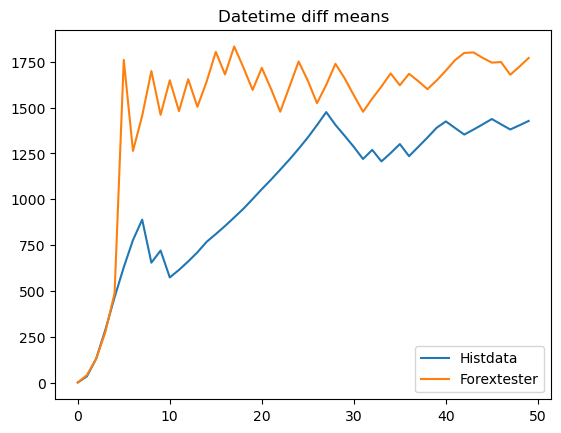

Datetime diff means head Histdata:
[1.4497290046312339, 35.236313706654414, 131.0, 288.54380254949825, 465.89301438215443]

Datetime diff means head Forextester:
[1.4591259508890493, 41.84472874640996, 131.21849574789232, 276.54688972667304, 488.0378016459758]



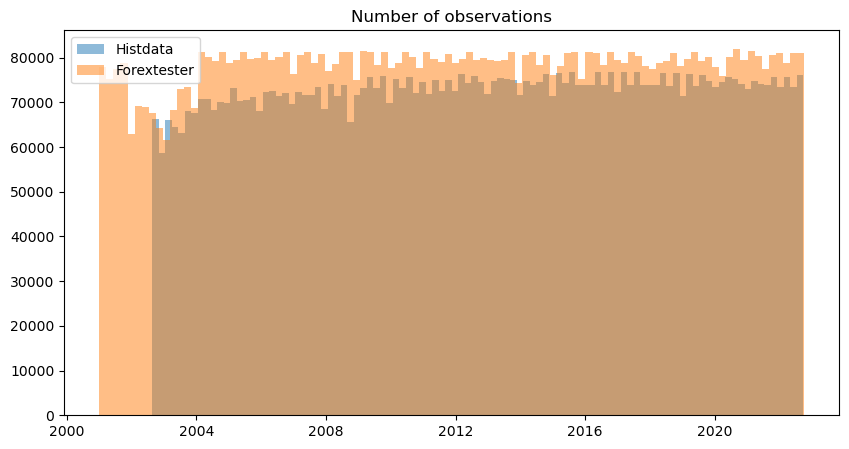

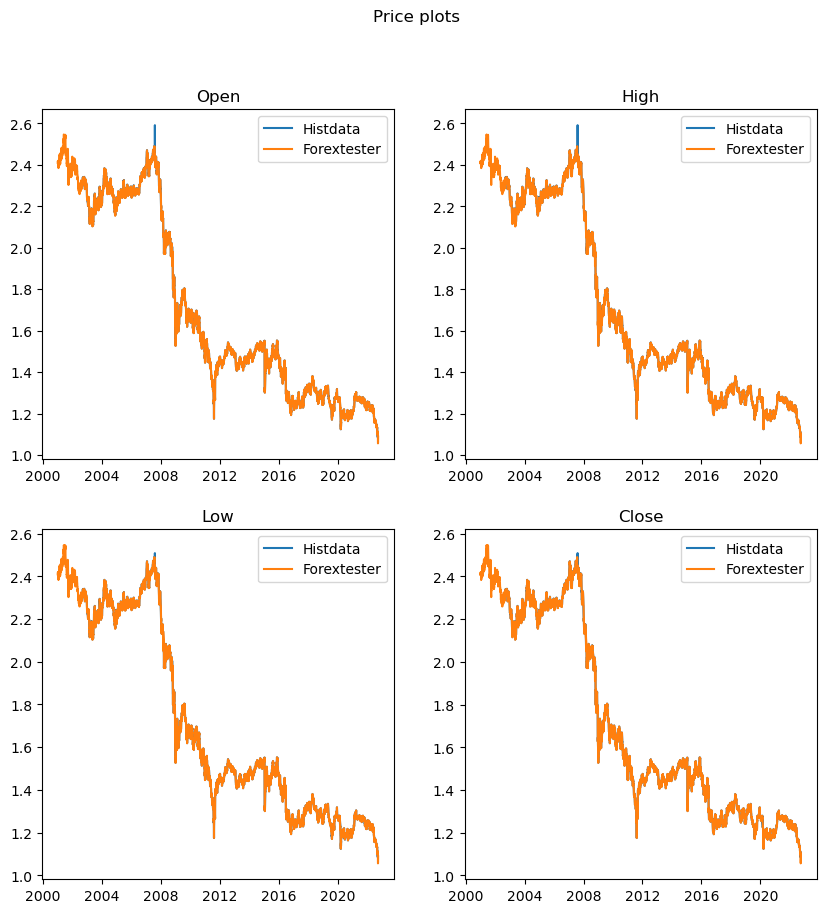



GBPJPY

Histdata start: 2002-05-01 10:00:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7389128

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7819639

Price value counts Histdata:


116.809998     1
116.830002     2
116.839996     1
116.860001     2
116.870003     9
              ..
251.139999    13
251.149994     4
251.160004     5
251.169998     3
251.179993     1
Name: value, Length: 84046, dtype: int64


Price value counts Forextester:


116.800003     1
116.809998     1
116.820000     2
116.849998     7
116.860001    10
              ..
251.029999    12
251.039993     5
251.050003     8
251.059998     4
251.070007     1
Name: value, Length: 13426, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2019-10-27 19:15:00    2
2021-10-31 19:22:00    2
2021-10-31 19:48:00    2
2021-10-31 19:49:00    2
2021-10-31 19:50:00    2
                      ..
2009-06-10 22:14:00    1
2009-06-10 22:13:00    1
2009-06-10 22:12:00    1
2009-06-10 22:11:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7388948, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-08-20 06:37:00    1
2015-08-20 06:49:00    1
2015-08-20 06:48:00    1
2015-08-20 06:47:00    1
                      ..
2008-07-04 05:12:00    1
2008-07-04 05:11:00    1
2008-07-04 05:10:00    1
2008-07-04 05:09:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7819639, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7296656
0 days 00:02:00      68658
0 days 00:03:00      13267
0 days 00:04:00       4052
0 days 00:05:00       1827
                    ...   
0 days 02:37:00          1
0 days 03:01:00          1
0 days 01:26:00          1
0 days 01:55:00          1
2 days 00:22:00          1
Name: <DT>, Length: 322, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7720022
0 days 00:02:00      68638
0 days 00:03:00      17065
0 days 00:04:00       6349
0 days 00:05:00       5579
                    ...   
3 days 04:58:00          1
0 days 00:35:00          1
0 days 01:58:00          1
0 days 06:22:00          1
2 days 22:01:00          1
Name: <DT>, Length: 117, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    388
2 days 00:02:00    175
2 days 00:03:00     50
2 days 00:30:00     46
2 days 00:31:00     33
                  ... 
0 days 02:37:00      1
0 days 03:01:00      1
0 days 01:26:00      1
0 days 01:55:00      1
2 days 00:22:00      1
Name: <DT>, Length: 262, dtype: int64

Mean: 2616.7684729064044

Datetime large diff value counts Forextester:


2 days 02:00:00    556
2 days 02:01:00    162
2 days 01:01:00     90
2 days 02:02:00     58
2 days 02:03:00     44
                  ... 
3 days 04:59:00      1
3 days 04:58:00      1
0 days 01:58:00      1
0 days 06:22:00      1
2 days 22:01:00      1
Name: <DT>, Length: 81, dtype: int64

Mean: 2890.7694235588974



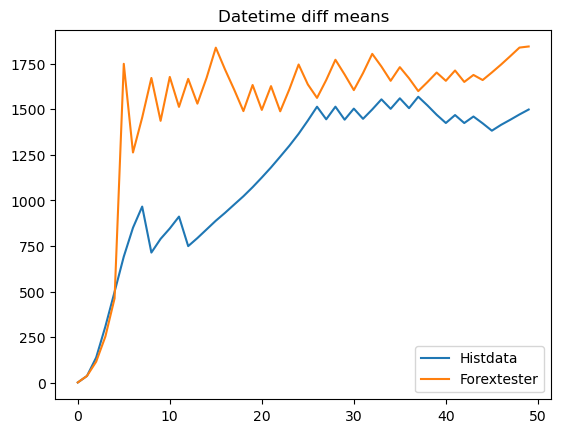

Datetime diff means head Histdata:
[1.4519195569381882, 37.1117647694953, 138.3465334061227, 308.6141665086289, 498.6813982137358]

Datetime diff means head Forextester:
[1.4623180766168464, 37.290957275939604, 115.48518303312028, 253.45396391863724, 462.83831306187204]



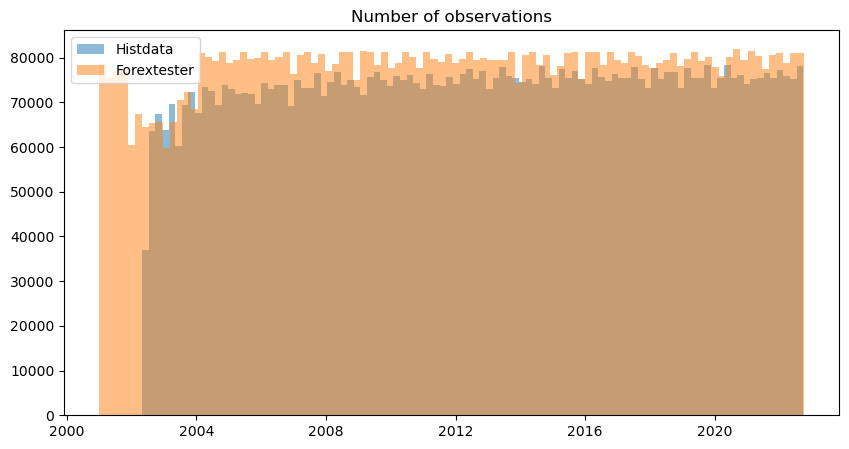

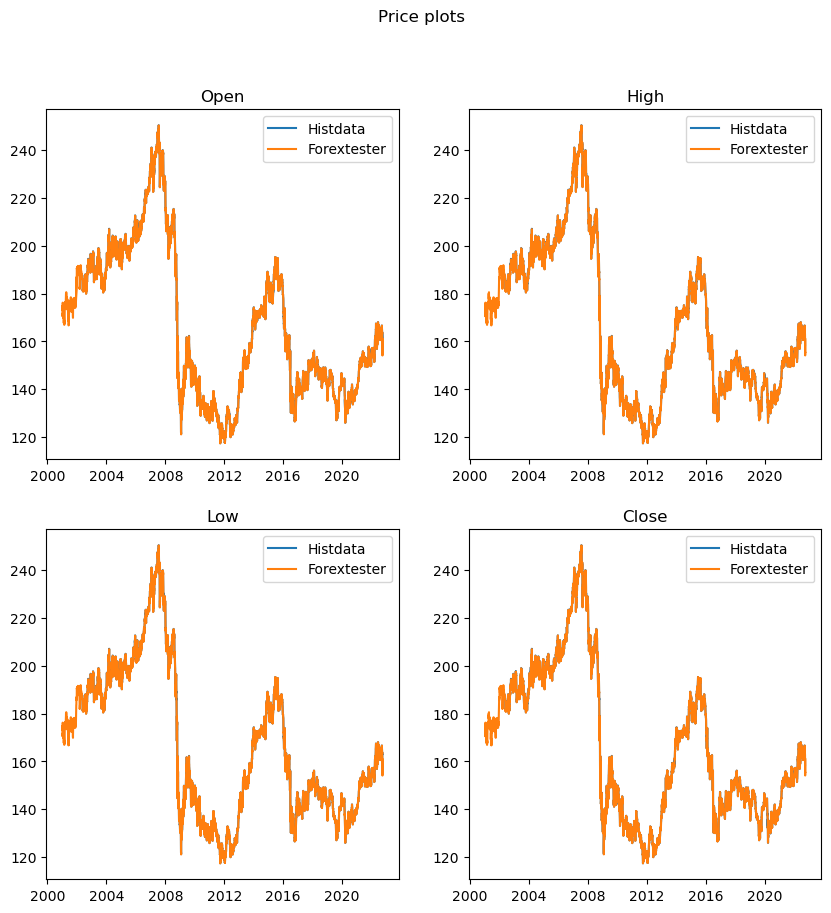



GBPUSD

Histdata start: 2000-05-30 17:59:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7440014

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7680490

Price value counts Histdata:


0.99990    4
1.08388    1
1.08419    1
1.08432    1
1.08433    2
          ..
2.11590    2
2.11600    2
2.11610    1
2.11620    2
2.11650    1
Name: value, Length: 65238, dtype: int64


Price value counts Forextester:


1.0370    4
1.0382    4
1.0402    4
1.0431    4
1.0447    1
         ..
2.1147    4
2.1153    1
2.1154    3
2.1157    2
2.1158    2
Name: value, Length: 10681, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2020-10-25 19:57:00    2
2021-10-31 19:45:00    2
2019-10-27 19:38:00    2
2019-10-27 19:37:00    2
2019-10-27 19:36:00    2
                      ..
2009-03-25 07:45:00    1
2009-03-25 07:44:00    1
2009-03-25 07:43:00    1
2009-03-25 07:42:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7439834, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-10-07 01:14:00    1
2015-10-07 01:26:00    1
2015-10-07 01:25:00    1
2015-10-07 01:24:00    1
                      ..
2008-10-07 10:20:00    1
2008-10-07 10:19:00    1
2008-10-07 10:18:00    1
2008-10-07 10:17:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7680490, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7095809
0 days 00:02:00     208870
0 days 00:03:00      63922
0 days 00:04:00      28111
0 days 00:05:00      14496
                    ...   
2 days 00:23:00          1
2 days 07:05:00          1
2 days 03:54:00          1
0 days 09:02:00          1
2 days 00:10:00          1
Name: <DT>, Length: 345, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7531863
0 days 00:02:00      79847
0 days 00:05:00      26664
0 days 00:03:00      26272
0 days 00:04:00      13230
                    ...   
3 days 04:58:00          1
0 days 01:58:00          1
0 days 06:22:00          1
0 days 11:26:00          1
2 days 22:01:00          1
Name: <DT>, Length: 116, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    615
2 days 00:02:00     67
2 days 00:31:00     50
2 days 00:30:00     39
2 days 00:03:00     25
                  ... 
2 days 00:23:00      1
2 days 07:05:00      1
2 days 03:54:00      1
0 days 09:02:00      1
2 days 00:10:00      1
Name: <DT>, Length: 285, dtype: int64

Mean: 2615.576530612245

Datetime large diff value counts Forextester:


2 days 02:00:00    561
2 days 02:01:00    159
2 days 01:01:00     89
2 days 02:02:00     42
2 days 02:03:00     37
                  ... 
3 days 04:58:00      1
0 days 01:58:00      1
0 days 06:22:00      1
0 days 11:26:00      1
2 days 22:01:00      1
Name: <DT>, Length: 81, dtype: int64

Mean: 2891.501253132832



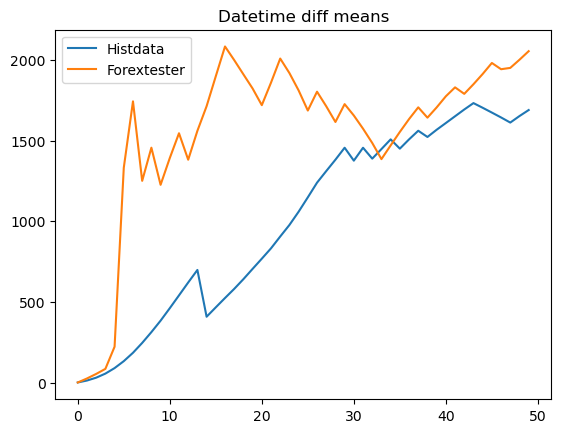

Datetime diff means head Histdata:
[1.5776019477385326, 13.484939163984148, 31.21041275658741, 56.46199518288243, 90.52031130920763]

Datetime diff means head Forextester:
[1.4888111941830788, 26.260109267557493, 54.42418470754154, 85.71580197079426, 222.88108312819543]



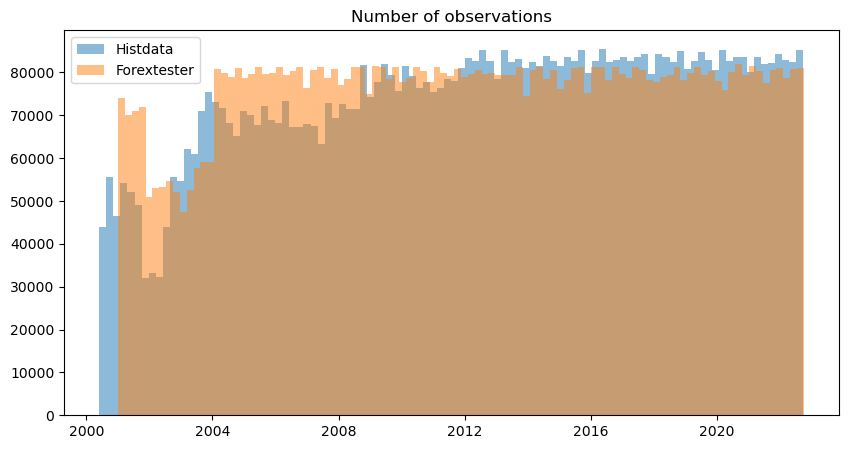

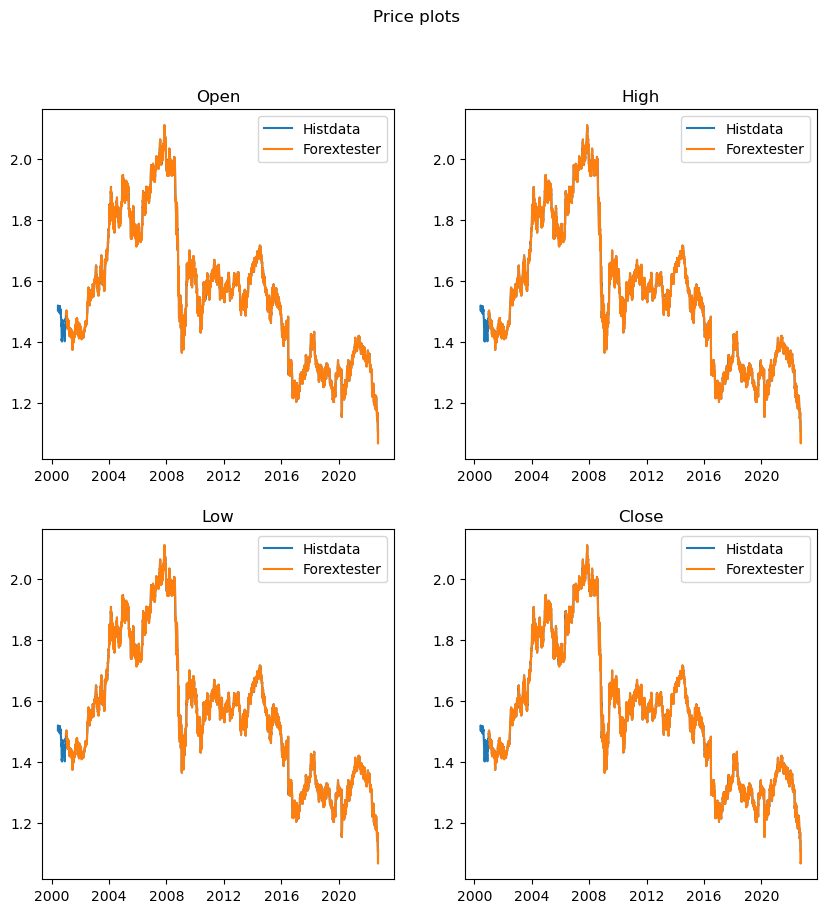



NZDJPY

Histdata start: 2006-09-03 17:00:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 5858874

Forextester start: 2003-01-01 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7102344

Price value counts Histdata:


44.270000     1
44.290001     1
44.299999     6
44.310001    14
44.320000    17
             ..
97.779999    25
97.790001    18
97.800003    14
97.809998     4
97.820000     2
Name: value, Length: 37608, dtype: int64


Price value counts Forextester:


44.200001     3
44.209999    12
44.220001    16
44.230000    15
44.240002    31
             ..
97.720001    24
97.730003    18
97.739998    20
97.750000    19
97.760002     5
Name: value, Length: 5357, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2020-10-25 19:12:00    2
2021-10-31 19:14:00    2
2021-10-31 19:26:00    2
2021-10-31 19:25:00    2
2021-10-31 19:24:00    2
                      ..
2012-03-26 04:08:00    1
2012-03-26 04:07:00    1
2012-03-26 04:06:00    1
2012-03-26 04:05:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 5858694, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2003-01-01 23:01:00    1
2016-04-13 07:50:00    1
2016-04-13 08:01:00    1
2016-04-13 08:00:00    1
2016-04-13 07:59:00    1
                      ..
2009-10-20 08:34:00    1
2009-10-20 08:33:00    1
2009-10-20 08:32:00    1
2009-10-20 08:31:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7102344, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    5768210
0 days 00:02:00      69141
0 days 00:03:00      13364
0 days 00:04:00       4077
0 days 00:05:00       1556
                    ...   
2 days 09:02:00          1
1 days 14:01:00          1
0 days 00:37:00          1
1 days 15:03:00          1
2 days 00:26:00          1
Name: <DT>, Length: 107, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7019233
0 days 00:02:00      51741
0 days 00:03:00      13930
0 days 00:05:00       9228
0 days 00:04:00       6584
                    ...   
0 days 00:30:00          1
2 days 04:01:00          1
0 days 00:50:00          1
1 days 05:02:00          1
2 days 18:29:00          1
Name: <DT>, Length: 96, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    389
2 days 00:02:00    213
2 days 00:03:00     89
2 days 00:06:00     17
2 days 00:05:00     16
                  ... 
2 days 09:06:00      1
2 days 09:02:00      1
1 days 14:01:00      1
1 days 15:03:00      1
2 days 00:26:00      1
Name: <DT>, Length: 70, dtype: int64

Mean: 2852.6546929316332

Datetime large diff value counts Forextester:


2 days 02:00:00    557
2 days 02:01:00    149
2 days 01:01:00     89
2 days 02:10:00     39
2 days 01:00:00     32
                  ... 
2 days 04:00:00      1
0 days 12:06:00      1
2 days 04:01:00      1
1 days 05:02:00      1
2 days 18:29:00      1
Name: <DT>, Length: 67, dtype: int64

Mean: 2892.1889400921655



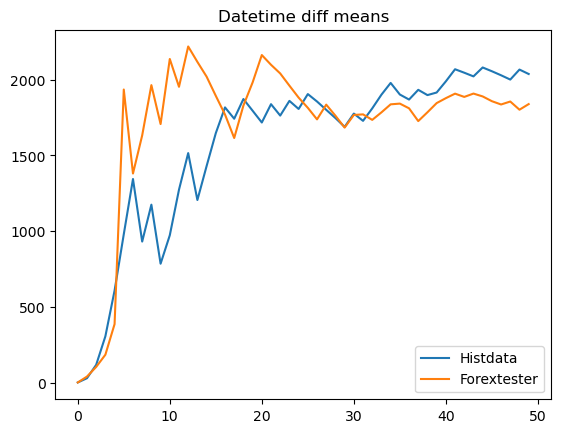

Datetime diff means head Histdata:
[1.441259778117737, 29.51532598744803, 117.91032431930117, 306.15028193184605, 608.004410683656]

Datetime diff means head Forextester:
[1.462198882819374, 40.498195163036925, 103.99831043386783, 184.6741785652847, 386.60248447204975]



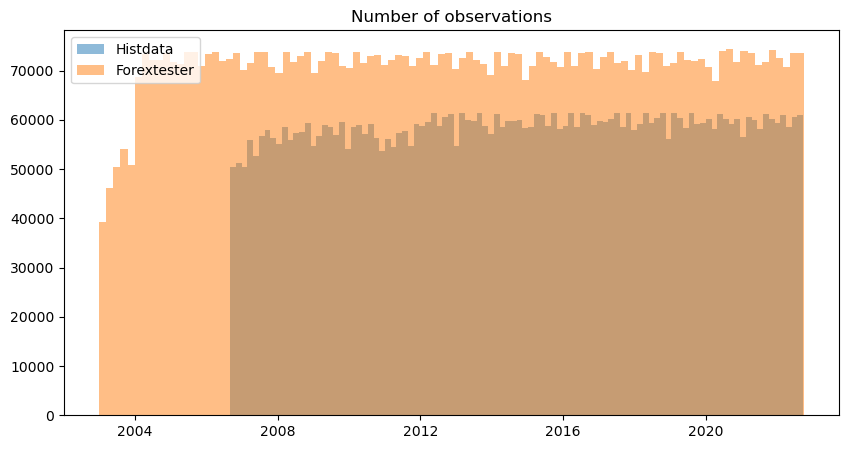

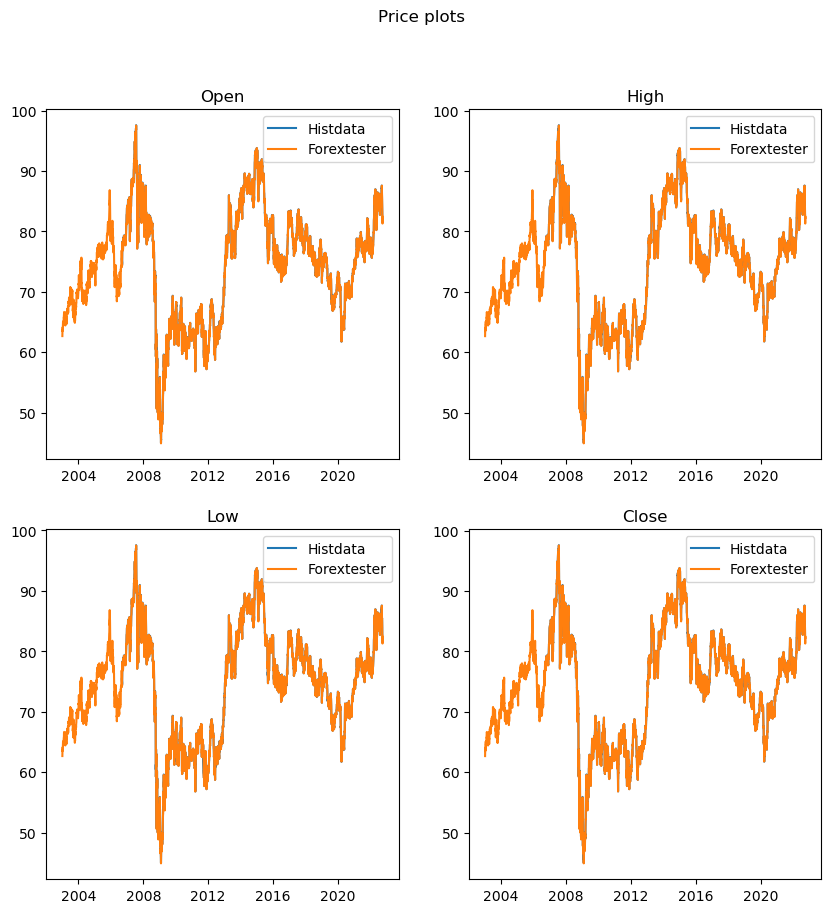



NZDUSD

Histdata start: 2005-08-12 17:01:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 5816628

Forextester start: 2003-01-01 23:02:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7025291

Price value counts Histdata:


0.4895    1
0.4902    1
0.4905    3
0.4906    1
0.4907    3
         ..
0.8837    4
0.8838    2
0.8839    2
0.8842    1
2.1709    2
Name: value, Length: 33528, dtype: int64


Price value counts Forextester:


0.4898    1
0.4899    2
0.4900    1
0.4902    1
0.4903    4
         ..
0.8835    7
0.8836    6
0.8837    3
0.8838    1
0.8841    1
Name: value, Length: 3941, dtype: int64


Anomal max price slice HistData:


,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
1699925,2011-07-31 21:10:00,0.8832,0.8839,0.8832,0.8837
1699926,2011-07-31 21:11:00,0.8836,0.8839,0.8836,0.8836
1699927,2011-07-31 21:12:00,0.8838,0.8842,0.8836,0.8836
1699928,2011-07-31 21:13:00,0.8837,0.8837,0.8835,0.8835
1699929,2011-07-31 21:14:00,0.8834,0.8834,0.8829,0.8830



NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:24:00    2
2019-10-27 19:47:00    2
2019-10-27 19:35:00    2
2019-10-27 19:36:00    2
2019-10-27 19:37:00    2
                      ..
2012-03-30 03:17:00    1
2012-03-30 03:16:00    1
2012-03-30 03:15:00    1
2012-03-30 03:14:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 5816448, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2003-01-01 23:02:00    1
2016-05-12 07:24:00    1
2016-05-12 07:22:00    1
2016-05-12 07:21:00    1
2016-05-12 07:20:00    1
                      ..
2009-12-16 18:02:00    1
2009-12-16 18:01:00    1
2009-12-16 18:00:00    1
2009-12-16 17:59:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7025291, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    5518216
0 days 00:02:00     184107
0 days 00:03:00      57744
0 days 00:04:00      24267
0 days 00:05:00      12575
                    ...   
2 days 02:04:00          1
0 days 00:51:00          1
0 days 01:00:00          1
3 days 02:33:00          1
2 days 00:14:00          1
Name: <DT>, Length: 124, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    6932777
0 days 00:02:00      36698
0 days 00:05:00      29516
0 days 00:03:00      15237
0 days 00:04:00       9106
                    ...   
0 days 00:30:00          1
2 days 04:01:00          1
0 days 00:50:00          1
1 days 05:02:00          1
2 days 22:01:00          1
Name: <DT>, Length: 96, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    430
2 days 00:02:00    196
2 days 00:03:00     67
2 days 00:06:00     24
2 days 00:05:00     22
                  ... 
4 days 02:03:00      1
2 days 02:02:00      1
2 days 02:04:00      1
3 days 02:33:00      1
2 days 00:14:00      1
Name: <DT>, Length: 73, dtype: int64

Mean: 2855.915217391304

Datetime large diff value counts Forextester:


2 days 02:00:00    561
2 days 02:01:00    148
2 days 01:01:00     89
2 days 02:10:00     34
2 days 01:00:00     32
                  ... 
2 days 04:00:00      1
0 days 12:06:00      1
2 days 04:01:00      1
1 days 05:02:00      1
2 days 22:01:00      1
Name: <DT>, Length: 68, dtype: int64

Mean: 2891.319815668203



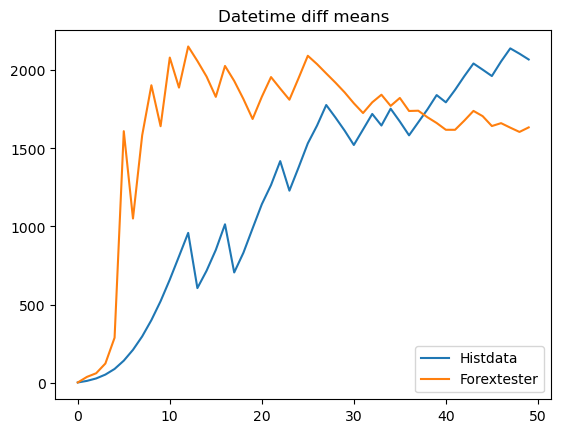

Datetime diff means head Histdata:
[1.5475355390675727, 11.672562338519693, 27.251950937849944, 52.01158062234796, 88.090514972285]

Datetime diff means head Forextester:
[1.4782360585826353, 37.31648525072152, 60.5368449341575, 122.86718126164492, 287.9744169227988]



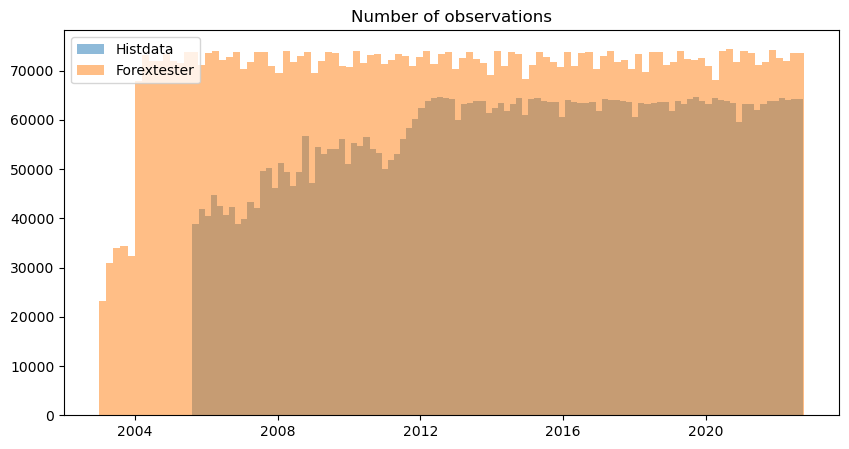

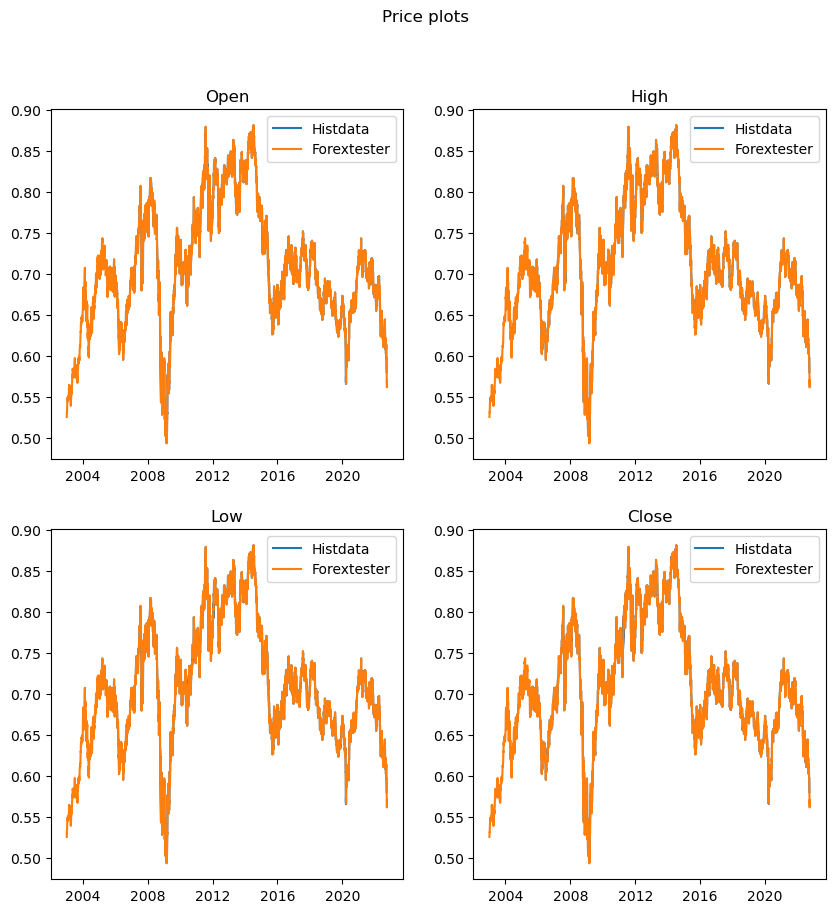



USDCAD

Histdata start: 2000-06-12 13:25:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 6628831

Forextester start: 2001-01-02 23:07:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7470948

Price value counts Histdata:


0.9060    1
0.9063    2
0.9065    4
0.9066    5
0.9067    3
         ..
1.6207    1
1.6208    1
1.6229    1
1.6262    2
1.6267    1
Name: value, Length: 52103, dtype: int64


Price value counts Forextester:


0.9056     1
0.9058     3
0.9061     3
0.9062     9
0.9063     3
          ..
1.6177    20
1.6178     4
1.6179    18
1.6181     9
1.6182     3
Name: value, Length: 7122, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:14:00    2
2020-10-25 19:37:00    2
2020-10-25 19:11:00    2
2020-10-25 19:10:00    2
2020-10-25 19:09:00    2
                      ..
2010-07-14 14:16:00    1
2010-07-14 14:15:00    1
2010-07-14 14:14:00    1
2010-07-14 14:13:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 6628651, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:07:00    1
2015-12-15 11:29:00    1
2015-12-15 11:55:00    1
2015-12-15 11:54:00    1
2015-12-15 11:53:00    1
                      ..
2009-02-26 02:01:00    1
2009-02-26 02:00:00    1
2009-02-26 01:59:00    1
2009-02-26 01:58:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7470948, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    6126501
0 days 00:02:00     270364
0 days 00:03:00      94811
0 days 00:04:00      45897
0 days 00:05:00      26110
                    ...   
0 days 08:03:00          1
1 days 15:09:00          1
0 days 02:29:00          1
1 days 04:03:00          1
2 days 00:14:00          1
Name: <DT>, Length: 356, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7257306
0 days 00:02:00      93688
0 days 00:05:00      52404
0 days 00:03:00      38620
0 days 00:04:00      21402
                    ...   
2 days 00:06:00          1
1 days 06:04:00          1
0 days 04:59:00          1
0 days 01:16:00          1
2 days 22:01:00          1
Name: <DT>, Length: 149, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    587
2 days 00:02:00     85
2 days 00:31:00     44
2 days 00:30:00     37
2 days 00:03:00     37
                  ... 
0 days 08:03:00      1
1 days 15:09:00      1
0 days 02:29:00      1
1 days 04:03:00      1
2 days 00:14:00      1
Name: <DT>, Length: 295, dtype: int64

Mean: 2528.266844563042

Datetime large diff value counts Forextester:


2 days 02:00:00    561
2 days 02:01:00    151
2 days 01:01:00     90
2 days 02:10:00     40
2 days 02:09:00     35
                  ... 
2 days 00:06:00      1
1 days 06:04:00      1
0 days 04:59:00      1
0 days 01:16:00      1
2 days 22:01:00      1
Name: <DT>, Length: 93, dtype: int64

Mean: 2879.5499168053248



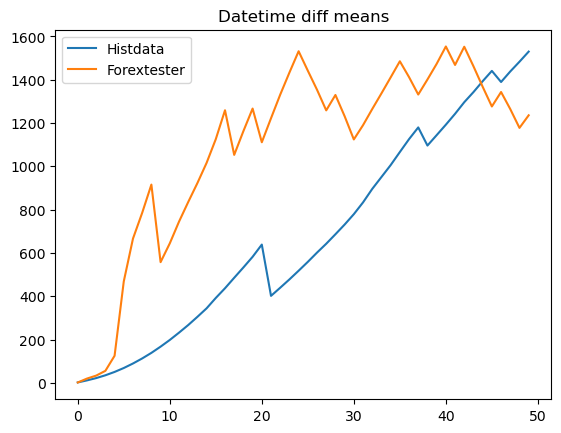

Datetime diff means head Histdata:
[1.7678735161408576, 11.133006455928289, 21.777871661673093, 34.75852691135512, 50.22828933670843]

Datetime diff means head Forextester:
[1.5305679454023702, 19.553765428920478, 33.26394504514268, 55.190898458896505, 124.86536001935774]



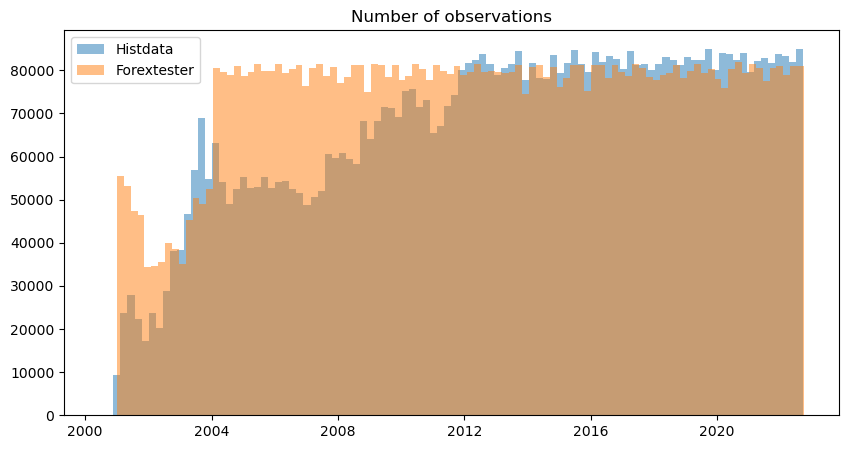

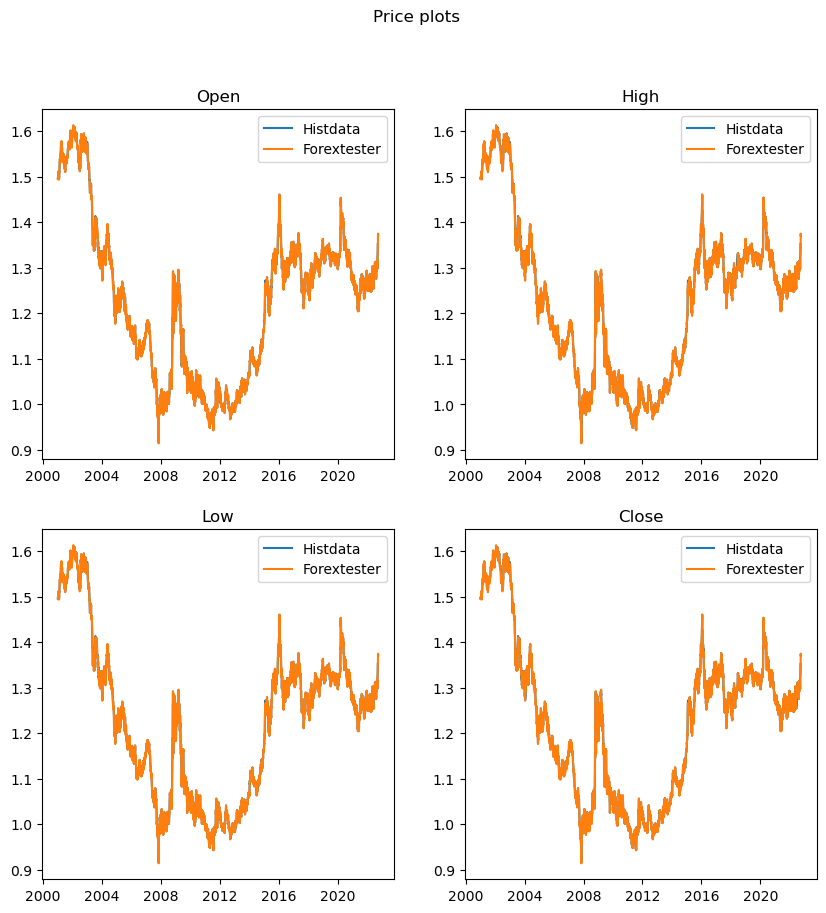



USDCHF

Histdata start: 2000-05-30 17:23:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7536028

Forextester start: 2001-01-02 23:01:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7778849

Price value counts Histdata:


0.6397    1
0.6413    1
0.7082    1
0.7091    1
0.7101    2
         ..
1.8304    3
1.8307    1
1.8309    1
1.8311    1
1.8313    1
Name: value, Length: 27604, dtype: int64


Price value counts Forextester:


0.7068    1
0.7094    1
0.7098    1
0.7100    2
0.7101    2
         ..
1.8217    5
1.8218    2
1.8219    2
1.8220    2
1.8221    2
Name: value, Length: 11066, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:30:00    2
2021-10-31 19:53:00    2
2021-10-31 19:43:00    2
2021-10-31 19:44:00    2
2021-10-31 19:45:00    2
                      ..
2008-12-03 01:20:00    1
2008-12-03 01:19:00    1
2008-12-03 01:18:00    1
2008-12-03 01:17:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7535849, dtype: int64


Duplicate dates count: 179

Datetime value counts Forextester:


2001-01-02 23:01:00    1
2015-09-03 18:57:00    1
2015-09-03 19:09:00    1
2015-09-03 19:08:00    1
2015-09-03 19:07:00    1
                      ..
2008-08-04 16:54:00    1
2008-08-04 16:53:00    1
2008-08-04 16:52:00    1
2008-08-04 16:51:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7778849, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7201857
0 days 00:02:00     219387
0 days 00:03:00      59854
0 days 00:04:00      23947
0 days 00:05:00      11491
                    ...   
2 days 07:00:00          1
2 days 03:54:00          1
0 days 09:03:00          1
2 days 00:53:00          1
2 days 00:17:00          1
Name: <DT>, Length: 343, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7665982
0 days 00:02:00      69359
0 days 00:03:00      20445
0 days 00:05:00      11895
0 days 00:04:00       9108
                    ...   
0 days 01:58:00          1
0 days 06:22:00          1
0 days 11:28:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 108, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    564
2 days 00:02:00     82
2 days 00:30:00     53
2 days 00:31:00     51
2 days 00:03:00     25
                  ... 
2 days 07:00:00      1
2 days 03:54:00      1
0 days 09:03:00      1
2 days 00:53:00      1
2 days 00:17:00      1
Name: <DT>, Length: 282, dtype: int64

Mean: 2644.530492285084

Datetime large diff value counts Forextester:


2 days 02:00:00    562
2 days 02:01:00    159
2 days 01:01:00     90
2 days 02:02:00     56
2 days 02:03:00     47
                  ... 
0 days 01:58:00      1
0 days 06:22:00      1
0 days 11:28:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 74, dtype: int64

Mean: 2897.8182579564486



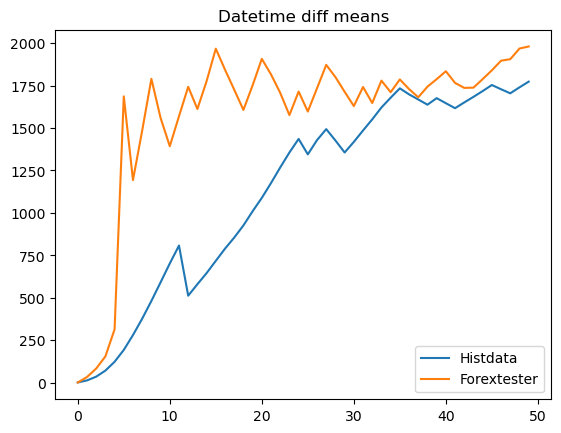

Datetime diff means head Histdata:
[1.557507025916972, 13.572606757039832, 35.691557112115916, 71.31427843215789, 123.34368342908785]

Datetime diff means head Forextester:
[1.469986044206032, 33.391951517728984, 83.43710207552809, 154.74646604804437, 314.25521626220115]



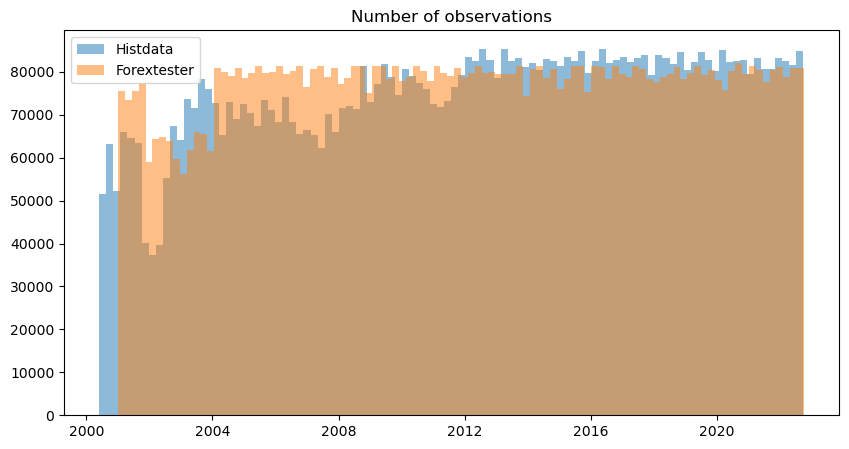

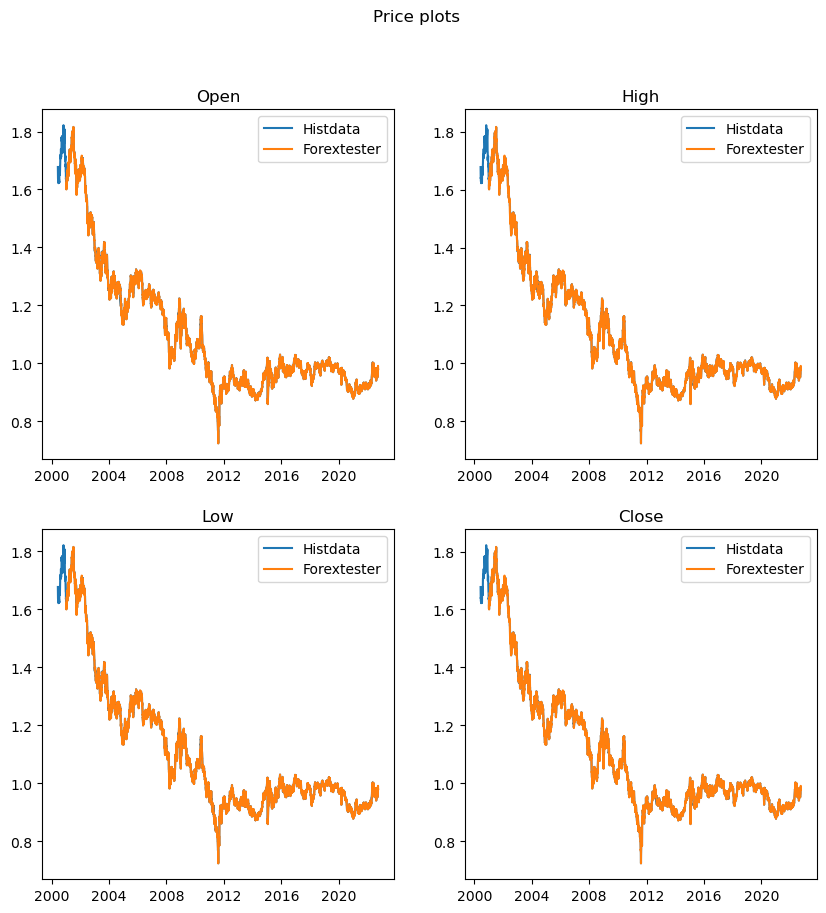



USDJPY

Histdata start: 2000-05-30 17:58:00
Histdata end: 2022-09-23 16:58:00
Histdata length: 7516048

Forextester start: 2001-01-02 23:03:00
Forextester end: 2022-09-30 18:59:00
Forextester length: 7733692

Price value counts Histdata:


75.559998      1
75.580002      1
75.610001      7
75.620003      6
75.629997     18
              ..
145.888000     1
145.893997     2
145.895996     1
145.899994     1
145.901001     1
Name: value, Length: 67991, dtype: int64


Price value counts Forextester:


75.550003      1
75.580002      1
75.589996      4
75.599998     10
75.610001      4
              ..
145.839996     2
145.850006     2
145.860001     3
145.869995     4
145.880005     4
Name: value, Length: 7009, dtype: int64


NaN count Histdata:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


NaN count Forextester:


<DT>       0
<OPEN>     0
<HIGH>     0
<LOW>      0
<CLOSE>    0
dtype: int64


Datetime value counts Histdata:


2021-10-31 19:27:00    2
2020-10-25 19:22:00    2
2020-10-25 19:37:00    2
2020-10-25 19:36:00    2
2020-10-25 19:34:00    2
                      ..
2008-10-28 10:14:00    1
2008-10-28 10:13:00    1
2008-10-28 10:12:00    1
2008-10-28 10:11:00    1
2022-09-23 16:58:00    1
Name: <DT>, Length: 7515868, dtype: int64


Duplicate dates count: 180

Datetime value counts Forextester:


2001-01-02 23:03:00    1
2015-09-18 09:33:00    1
2015-09-18 09:45:00    1
2015-09-18 09:44:00    1
2015-09-18 09:43:00    1
                      ..
2008-09-02 23:22:00    1
2008-09-02 23:21:00    1
2008-09-02 23:20:00    1
2008-09-02 23:19:00    1
2022-09-30 18:59:00    1
Name: <DT>, Length: 7733692, dtype: int64


Datetime diff value counts Histdata:


0 days 00:01:00    7140971
0 days 00:02:00     252812
0 days 00:03:00      67197
0 days 00:04:00      25623
0 days 00:05:00      11718
                    ...   
2 days 03:32:00          1
0 days 14:05:00          1
2 days 07:35:00          1
1 days 02:30:00          1
2 days 00:13:00          1
Name: <DT>, Length: 316, dtype: int64


Datetime diff value counts Forextester:


0 days 00:01:00    7599178
0 days 00:02:00      79110
0 days 00:03:00      25452
0 days 00:05:00      15921
0 days 00:04:00      11879
                    ...   
0 days 01:58:00          1
0 days 06:22:00          1
0 days 11:28:00          1
2 days 09:01:00          1
2 days 22:01:00          1
Name: <DT>, Length: 112, dtype: int64


Datetime large diff value counts Histdata:


2 days 00:01:00    675
2 days 00:31:00     51
2 days 00:02:00     49
2 days 00:30:00     45
2 days 00:32:00     23
                  ... 
2 days 03:32:00      1
0 days 14:05:00      1
2 days 07:35:00      1
1 days 02:30:00      1
2 days 00:13:00      1
Name: <DT>, Length: 255, dtype: int64

Mean: 2639.841562269713

Datetime large diff value counts Forextester:


2 days 02:00:00    564
2 days 02:01:00    154
2 days 01:01:00     86
2 days 02:02:00     50
2 days 02:03:00     36
                  ... 
0 days 01:58:00      1
0 days 06:22:00      1
0 days 11:28:00      1
2 days 09:01:00      1
2 days 22:01:00      1
Name: <DT>, Length: 77, dtype: int64

Mean: 2898.087939698492



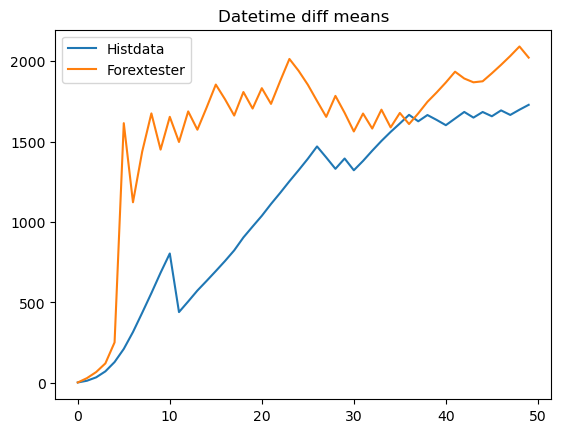

Datetime diff means head Histdata:
[1.561642709259269, 12.25460706630123, 33.45862232545965, 70.62658216354622, 128.6069148213558]

Datetime diff means head Forextester:
[1.4785690299754672, 28.514849865812234, 66.37543093334294, 120.23111081433004, 250.99337134711337]



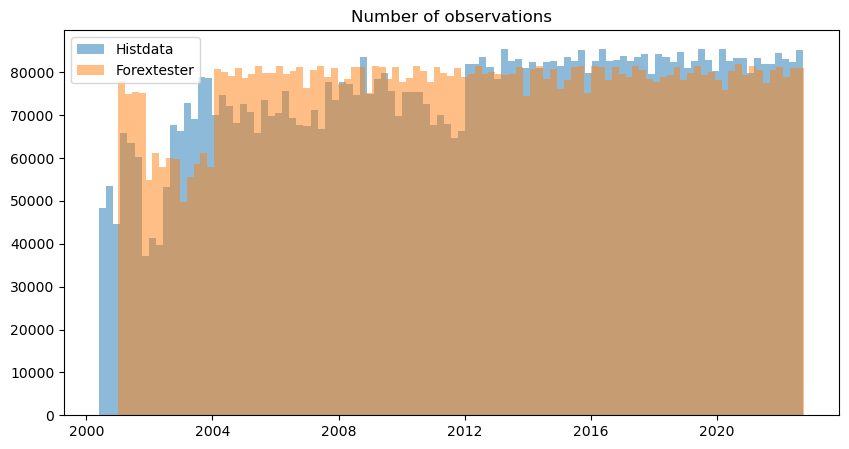

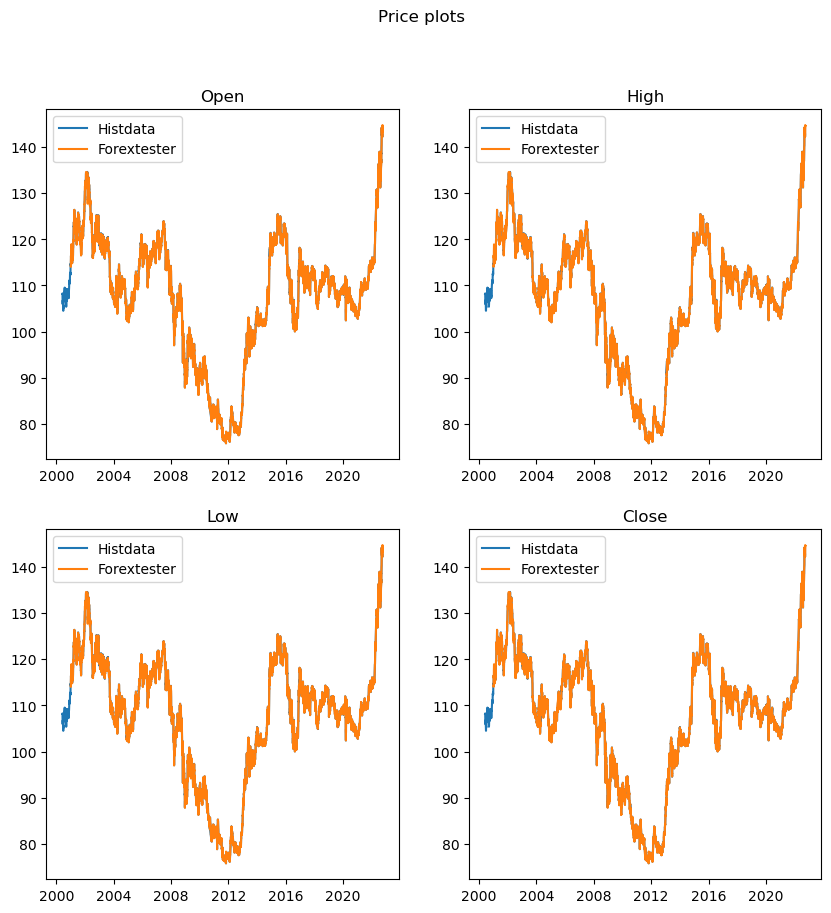

In [53]:
display(HTML("<style>.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea { max-height: 80em; }</style>"))

for pair in PAIRS:
    print(pair, end='\n\n')
    pair_histdata_df = load_processed_forex_data(ForexDataSource.HISTDATA, [pair])[pair]
    pair_histdata_df_melt = pd.melt(pair_histdata_df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']])
    
    pair_forextester_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, [pair])[pair]
    pair_forextester_df_melt = pd.melt(pair_forextester_df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']])
    
    print(f'Histdata start: {pair_histdata_df.iloc[0]["<DT>"]}')
    print(f'Histdata end: {pair_histdata_df.iloc[-1]["<DT>"]}')
    print(f'Histdata length: {len(pair_histdata_df)}', end='\n\n')
    
    print(f'Forextester start: {pair_forextester_df.iloc[0]["<DT>"]}')
    print(f'Forextester end: {pair_forextester_df.iloc[-1]["<DT>"]}')
    print(f'Forextester length: {len(pair_forextester_df)}', end='\n\n')
    
    print('Price value counts Histdata:')
    histdata_value_counts_sorted = pair_histdata_df_melt['value'].value_counts().sort_index()
    display(histdata_value_counts_sorted)
    print()
    
    print('Price value counts Forextester:')
    forextester_value_counts_sorted = pair_forextester_df_melt['value'].value_counts().sort_index()
    display(forextester_value_counts_sorted)
    print()
    
    if abs(histdata_value_counts_sorted.index[1] / histdata_value_counts_sorted.index[0]) > 1.1:
        print('Anomal min price slice HistData:')
        pair_histdata_df_min_idx = np.where((pair_histdata_df['<OPEN>'] == min(pair_histdata_df['<OPEN>'])))[0][0]
        display(pair_histdata_df.iloc[pair_histdata_df_min_idx - 2 : pair_histdata_df_min_idx + 3,])
        print()
    
    if abs(histdata_value_counts_sorted.index[-1] / histdata_value_counts_sorted.index[-2]) > 1.1:
        print('Anomal max price slice HistData:')
        pair_histdata_df_max_idx = np.where((pair_histdata_df['<OPEN>'] == max(pair_histdata_df['<OPEN>'])))[0][0]
        display(pair_histdata_df.iloc[pair_histdata_df_max_idx - 2 : pair_histdata_df_max_idx + 3,])
        print()
        
    if abs(forextester_value_counts_sorted.index[1] / forextester_value_counts_sorted.index[0]) > 1.1:
        print('Anomal min price slice Forextester:')
        pair_forextester_df_min_idx = np.where((pair_forextester_df['<OPEN>'] == min(pair_forextester_df['<OPEN>'])))[0][0]
        display(pair_forextester_df.iloc[pair_forextester_df_min_idx - 2 : pair_forextester_df_min_idx + 3,])
        print()
    
    if abs(forextester_value_counts_sorted.index[-1] / forextester_value_counts_sorted.index[-2]) > 1.1:
        print('Anomal max price slice Forextester:')
        pair_forextester_df_max_idx = np.where((pair_forextester_df['<OPEN>'] == max(pair_forextester_df['<OPEN>'])))[0][0]
        display(pair_forextester_df.iloc[pair_forextester_df_max_idx - 2 : pair_forextester_df_max_idx + 3,])
        print()
        
    print('NaN count Histdata:')
    display(pair_histdata_df.isna().sum())
    print()
    
    print('NaN count Forextester:')
    display(pair_forextester_df.isna().sum())
    print()
    
    print('Datetime value counts Histdata:')
    pair_histdata_dt_counts = pair_histdata_df['<DT>'].value_counts()
    display(pair_histdata_dt_counts)
    print()
    
    histdata_dt_duplicate_count = sum(pair_histdata_dt_counts > 1)
    if(histdata_dt_duplicate_count > 0):
        print(f'Duplicate dates count: {histdata_dt_duplicate_count}', end='\n\n')
        
        for dt in pair_histdata_dt_counts[pair_histdata_dt_counts > 1].index:
            dup_dt_slice = pair_histdata_df[pair_histdata_df['<DT>'] == dt]
            if not (dup_dt_slice.iloc[0] == dup_dt_slice.iloc[1]).all():
                print('Different price duplicate dates:')
                display(dup_dt_slice)
                print()
    
    print('Datetime value counts Forextester:')
    pair_forextester_dt_counts = pair_forextester_df['<DT>'].value_counts()
    display(pair_forextester_dt_counts)
    print()
    
    forextester_dt_duplicate_count = sum(pair_forextester_dt_counts > 1)
    if(forextester_dt_duplicate_count > 0):
        print(f'Duplicate count: {forextester_dt_duplicate_count}', end='\n\n')
        
        for dt in pair_forextester_dt_counts[pair_forextester_dt_counts > 1].index:
            dup_dt_slice = pair_forextester_df[pair_forextester_df['<DT>'] == dt]
            if not (dup_dt_slice.iloc[0] == dup_dt_slice.iloc[1]).all():
                print('Different price duplicate dates:')
                display(dup_dt_slice)
                print()
        
    print('Datetime diff value counts Histdata:')
    pair_histdata_dt_diff_counts = (pair_histdata_df['<DT>'] - pair_histdata_df['<DT>'].shift(1)).value_counts()
    display(pair_histdata_dt_diff_counts)
    print()
    
    print('Datetime diff value counts Forextester:')
    pair_forextester_dt_diff_counts = (pair_forextester_df['<DT>'] - pair_forextester_df['<DT>'].shift(1)).value_counts()
    display(pair_forextester_dt_diff_counts)
    print()
    
    print('Datetime large diff value counts Histdata:')
    pair_histdata_dt_diff_counts_larger = pair_histdata_dt_diff_counts[pair_histdata_dt_diff_counts.index > timedelta(hours=1)]
    display(pair_histdata_dt_diff_counts_larger)
    
    pair_histdata_dt_diffs_larger_mean = (
        (pair_histdata_dt_diff_counts_larger.index.total_seconds() / 60).values *
        pair_histdata_dt_diff_counts_larger /
        pair_histdata_dt_diff_counts_larger.sum()
    ).sum()
    
    print(f'Mean: {pair_histdata_dt_diffs_larger_mean}', end='\n\n')
    
    print('Datetime large diff value counts Forextester:')
    pair_forextester_dt_diff_counts_larger = pair_forextester_dt_diff_counts[pair_forextester_dt_diff_counts.index > timedelta(hours=1)]
    display(pair_forextester_dt_diff_counts_larger)
    
    pair_forextester_dt_diffs_larger_mean = (
        (pair_forextester_dt_diff_counts_larger.index.total_seconds() / 60).values *
        pair_forextester_dt_diff_counts_larger /
        pair_forextester_dt_diff_counts_larger.sum()
    ).sum()
    
    print(f'Mean: {pair_forextester_dt_diffs_larger_mean}', end='\n\n')
    
    pair_histdata_dt_diffs_means = []
    for i in range(50):
        pair_histdata_dt_diffs_means.append((
            (pair_histdata_dt_diff_counts[i:].index.total_seconds() / 60).values *
            pair_histdata_dt_diff_counts[i:] /
            pair_histdata_dt_diff_counts[i:].sum()
        ).sum())
        
    pair_forextester_dt_diffs_means = []
    for i in range(50):
        pair_forextester_dt_diffs_means.append((
            (pair_forextester_dt_diff_counts[i:].index.total_seconds() / 60).values *
            pair_forextester_dt_diff_counts[i:] /
            pair_forextester_dt_diff_counts[i:].sum()
        ).sum())
        
    plt.plot(np.linspace(0,49,50), pair_histdata_dt_diffs_means, label='Histdata')
    plt.plot(np.linspace(0,49,50), pair_forextester_dt_diffs_means, label='Forextester')
    plt.title('Datetime diff means')
    plt.legend()
    plt.show()
    
    print('Datetime diff means head Histdata:')
    print(pair_histdata_dt_diffs_means[:5], end='\n\n')
    
    print('Datetime diff means head Forextester:')
    print(pair_forextester_dt_diffs_means[:5], end='\n\n')
    
    plt.figure(figsize=(10,5))
    plt.title('Number of observations')
    plt.hist(pd.Series(
        index=np.ones(len(pair_histdata_df)), data=pair_histdata_df['<DT>'].values
    ), bins=100, alpha=0.5, label='Histdata')
    plt.hist(pd.Series(
        index=np.ones(len(pair_forextester_df)), data=pair_forextester_df['<DT>'].values
    ), bins=100, alpha=0.5, label='Forextester')
    plt.legend()
    plt.show()
    
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    fig.suptitle('Price plots')
    axs[0, 0].plot(pair_histdata_df['<DT>'], pair_histdata_df['<OPEN>'].rolling(window=60*24).mean(), label='Histdata')
    axs[0, 0].plot(pair_forextester_df['<DT>'], pair_forextester_df['<OPEN>'].rolling(window=60*24).mean(), label='Forextester')
    axs[0, 0].set_title('Open')
    axs[0, 0].legend()
    axs[0, 1].plot(pair_histdata_df['<DT>'], pair_histdata_df['<HIGH>'].rolling(window=60*24).mean(), label='Histdata')
    axs[0, 1].plot(pair_forextester_df['<DT>'], pair_forextester_df['<HIGH>'].rolling(window=60*24).mean(), label='Forextester')
    axs[0, 1].set_title('High')
    axs[0, 1].legend()
    axs[1, 0].plot(pair_histdata_df['<DT>'], pair_histdata_df['<LOW>'].rolling(window=60*24).mean(), label='Histdata')
    axs[1, 0].plot(pair_forextester_df['<DT>'], pair_forextester_df['<LOW>'].rolling(window=60*24).mean(), label='Forextester')
    axs[1, 0].set_title('Low')
    axs[1, 0].legend()
    axs[1, 1].plot(pair_histdata_df['<DT>'], pair_histdata_df['<CLOSE>'].rolling(window=60*24).mean(), label='Histdata')
    axs[1, 1].plot(pair_forextester_df['<DT>'], pair_forextester_df['<CLOSE>'].rolling(window=60*24).mean(), label='Forextester')
    axs[1, 1].set_title('Close')
    axs[1, 1].legend()
    plt.show()
    
    print()
    print()

### Forextester further preprocessing

In [54]:
eurusd_forextester_full_daterange_df = pd.DataFrame(
    pd.date_range(eurusd_forextester_df['<DT>'].min(), eurusd_forextester_df['<DT>'].max(), freq='min'), 
    columns=['<DT>']
)

In [55]:
eurusd_forextester_df = eurusd_forextester_df.merge(eurusd_forextester_full_daterange_df, how='right', on='<DT>')

In [56]:
eurusd_forextester_first_nan_idx = np.where(
    (~eurusd_forextester_df['<CLOSE>'].shift(1).isna()) & (eurusd_forextester_df['<CLOSE>'].isna())
)[0]

In [57]:
eurusd_forextester_df.iloc[eurusd_forextester_first_nan_idx]

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
16,2001-01-02 23:17:00,NaN,NaN,NaN,NaN
24,2001-01-02 23:25:00,NaN,NaN,NaN,NaN
31,2001-01-02 23:32:00,NaN,NaN,NaN,NaN
41,2001-01-02 23:42:00,NaN,NaN,NaN,NaN
45,2001-01-02 23:46:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
11427881,2022-09-25 23:42:00,NaN,NaN,NaN,NaN
11429320,2022-09-26 23:41:00,NaN,NaN,NaN,NaN
11430761,2022-09-27 23:42:00,NaN,NaN,NaN,NaN
11432200,2022-09-28 23:41:00,NaN,NaN,NaN,NaN


In [58]:
eurusd_forextester_df.iloc[eurusd_forextester_first_nan_idx - 1]

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
15,2001-01-02 23:16:00,0.9507,0.9507,0.9506,0.9506
23,2001-01-02 23:24:00,0.9507,0.9507,0.9507,0.9507
30,2001-01-02 23:31:00,0.9508,0.9508,0.9508,0.9508
40,2001-01-02 23:41:00,0.9508,0.9508,0.9508,0.9508
44,2001-01-02 23:45:00,0.9508,0.9508,0.9508,0.9508
...,...,...,...,...,...
11427880,2022-09-25 23:41:00,0.9647,0.9647,0.9647,0.9647
11429319,2022-09-26 23:40:00,0.9632,0.9632,0.9632,0.9632
11430760,2022-09-27 23:41:00,0.9564,0.9564,0.9564,0.9564
11432199,2022-09-28 23:40:00,0.9683,0.9683,0.9683,0.9683


In [59]:
eurusd_forextester_df.loc[eurusd_forextester_first_nan_idx, ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']] = pd.Series(
    eurusd_forextester_df.iloc[eurusd_forextester_first_nan_idx - 1]['<CLOSE>'].values,
    index=eurusd_forextester_first_nan_idx
)

In [60]:
eurusd_forextester_df.iloc[eurusd_forextester_first_nan_idx]

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
16,2001-01-02 23:17:00,0.9506,0.9506,0.9506,0.9506
24,2001-01-02 23:25:00,0.9507,0.9507,0.9507,0.9507
31,2001-01-02 23:32:00,0.9508,0.9508,0.9508,0.9508
41,2001-01-02 23:42:00,0.9508,0.9508,0.9508,0.9508
45,2001-01-02 23:46:00,0.9508,0.9508,0.9508,0.9508
...,...,...,...,...,...
11427881,2022-09-25 23:42:00,0.9647,0.9647,0.9647,0.9647
11429320,2022-09-26 23:41:00,0.9632,0.9632,0.9632,0.9632
11430761,2022-09-27 23:42:00,0.9564,0.9564,0.9564,0.9564
11432200,2022-09-28 23:41:00,0.9683,0.9683,0.9683,0.9683


In [61]:
eurusd_forextester_df.fillna(method='ffill', inplace=True)

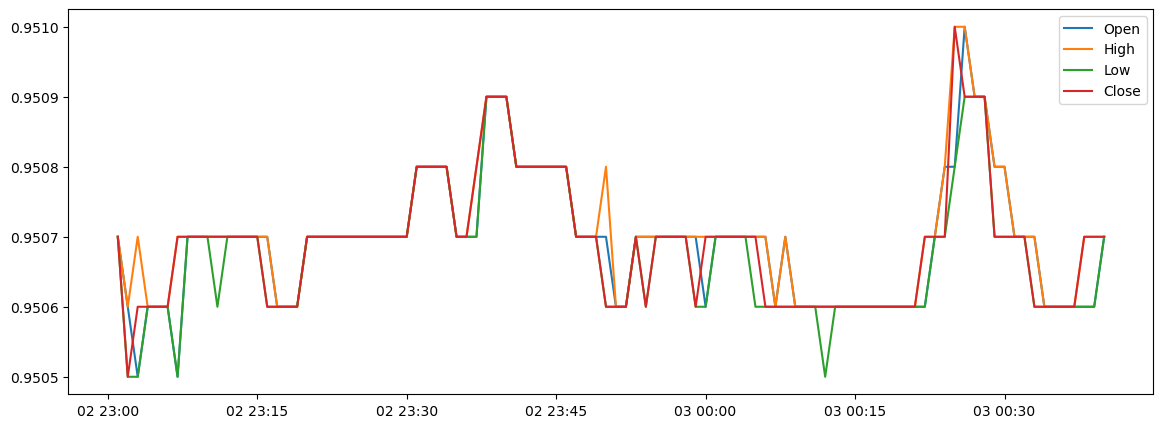

In [62]:
plt.figure(figsize=(14,5))
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<OPEN>'], label='Open')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<HIGH>'], label='High')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<LOW>'], label='Low')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<CLOSE>'], label='Close')
plt.legend()

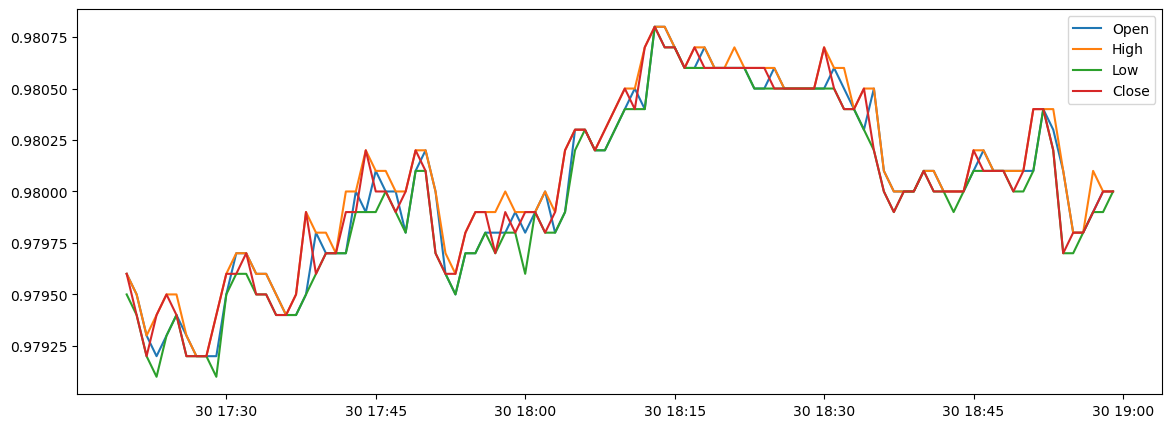

In [63]:
plt.figure(figsize=(14,5))
plt.plot(eurusd_forextester_df[-100:]['<DT>'], eurusd_forextester_df[-100:]['<OPEN>'], label='Open')
plt.plot(eurusd_forextester_df[-100:]['<DT>'], eurusd_forextester_df[-100:]['<HIGH>'], label='High')
plt.plot(eurusd_forextester_df[-100:]['<DT>'], eurusd_forextester_df[-100:]['<LOW>'], label='Low')
plt.plot(eurusd_forextester_df[-100:]['<DT>'], eurusd_forextester_df[-100:]['<CLOSE>'], label='Close')
plt.legend()

In [64]:
eurusd_forextester_df['<DT>'] = eurusd_forextester_df['<DT>'].apply(
    lambda dt: dt.replace(minute=(dt.minute // AGG_INTERVAL) * AGG_INTERVAL)
)

In [65]:
eurusd_forextester_df = eurusd_forextester_df.groupby('<DT>').agg({
    '<OPEN>' : lambda group: group.iloc[0],
    '<HIGH>' : np.max, 
    '<LOW>' : np.min, 
    '<CLOSE>' : lambda group: group.iloc[-1]
}).reset_index()

In [66]:
eurusd_forextester_df

,<DT>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,2001-01-02 23:00:00,0.9507,0.9507,0.9505,0.9507
1,2001-01-02 23:15:00,0.9507,0.9507,0.9506,0.9507
2,2001-01-02 23:30:00,0.9507,0.9509,0.9507,0.9508
3,2001-01-02 23:45:00,0.9508,0.9508,0.9506,0.9506
4,2001-01-03 00:00:00,0.9506,0.9507,0.9505,0.9506
...,...,...,...,...,...
762315,2022-09-30 17:45:00,0.9801,0.9802,0.9795,0.9798
762316,2022-09-30 18:00:00,0.9798,0.9808,0.9796,0.9807
762317,2022-09-30 18:15:00,0.9807,0.9807,0.9805,0.9805
762318,2022-09-30 18:30:00,0.9805,0.9807,0.9799,0.9800


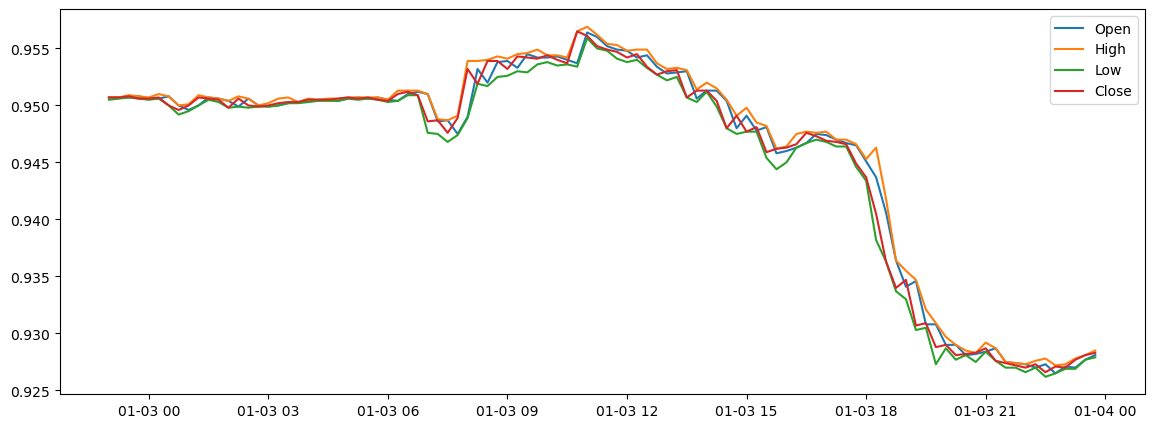

In [67]:
plt.figure(figsize=(14,5))
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<OPEN>'], label='Open')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<HIGH>'], label='High')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<LOW>'], label='Low')
plt.plot(eurusd_forextester_df[:100]['<DT>'], eurusd_forextester_df[:100]['<CLOSE>'], label='Close')
plt.legend()

In [69]:
for pair in tqdm(PAIRS):
    
    pair_forextester_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, [pair])[pair]
    
    pair_forextester_full_daterange_df = pd.DataFrame(
        pd.date_range(pair_forextester_df['<DT>'].min(), pair_forextester_df['<DT>'].max(), freq='min'), 
        columns=['<DT>']
    )
    pair_forextester_df = pair_forextester_df.merge(pair_forextester_full_daterange_df, how='right', on='<DT>')
    
    pair_forextester_first_nan_idx = np.where(
        (~pair_forextester_df['<CLOSE>'].shift(1).isna()) & (pair_forextester_df['<CLOSE>'].isna())
    )[0]
    pair_forextester_df.loc[pair_forextester_first_nan_idx, ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']] = pd.Series(
        pair_forextester_df.iloc[pair_forextester_first_nan_idx - 1]['<CLOSE>'].values,
        index=pair_forextester_first_nan_idx
    )
    pair_forextester_df.fillna(method='ffill', inplace=True)
    
    pair_forextester_df['<DT>'] = pair_forextester_df['<DT>'].apply(
        lambda dt: dt.replace(minute=(dt.minute // AGG_INTERVAL) * AGG_INTERVAL)
    )
    pair_forextester_df = pair_forextester_df.groupby('<DT>').agg({
        '<OPEN>' : lambda group: group.iloc[0],
        '<HIGH>' : np.max, 
        '<LOW>' : np.min, 
        '<CLOSE>' : lambda group: group.iloc[-1]
    }).reset_index()
    
    pair_forextester_df.to_pickle(f'{FOREX_DATA_PATH}/Forextester/Processed/Agg/{pair}.pkl')

100%|█████████████████████████████████| 16/16 [18:16<00:00, 68.53s/it]
